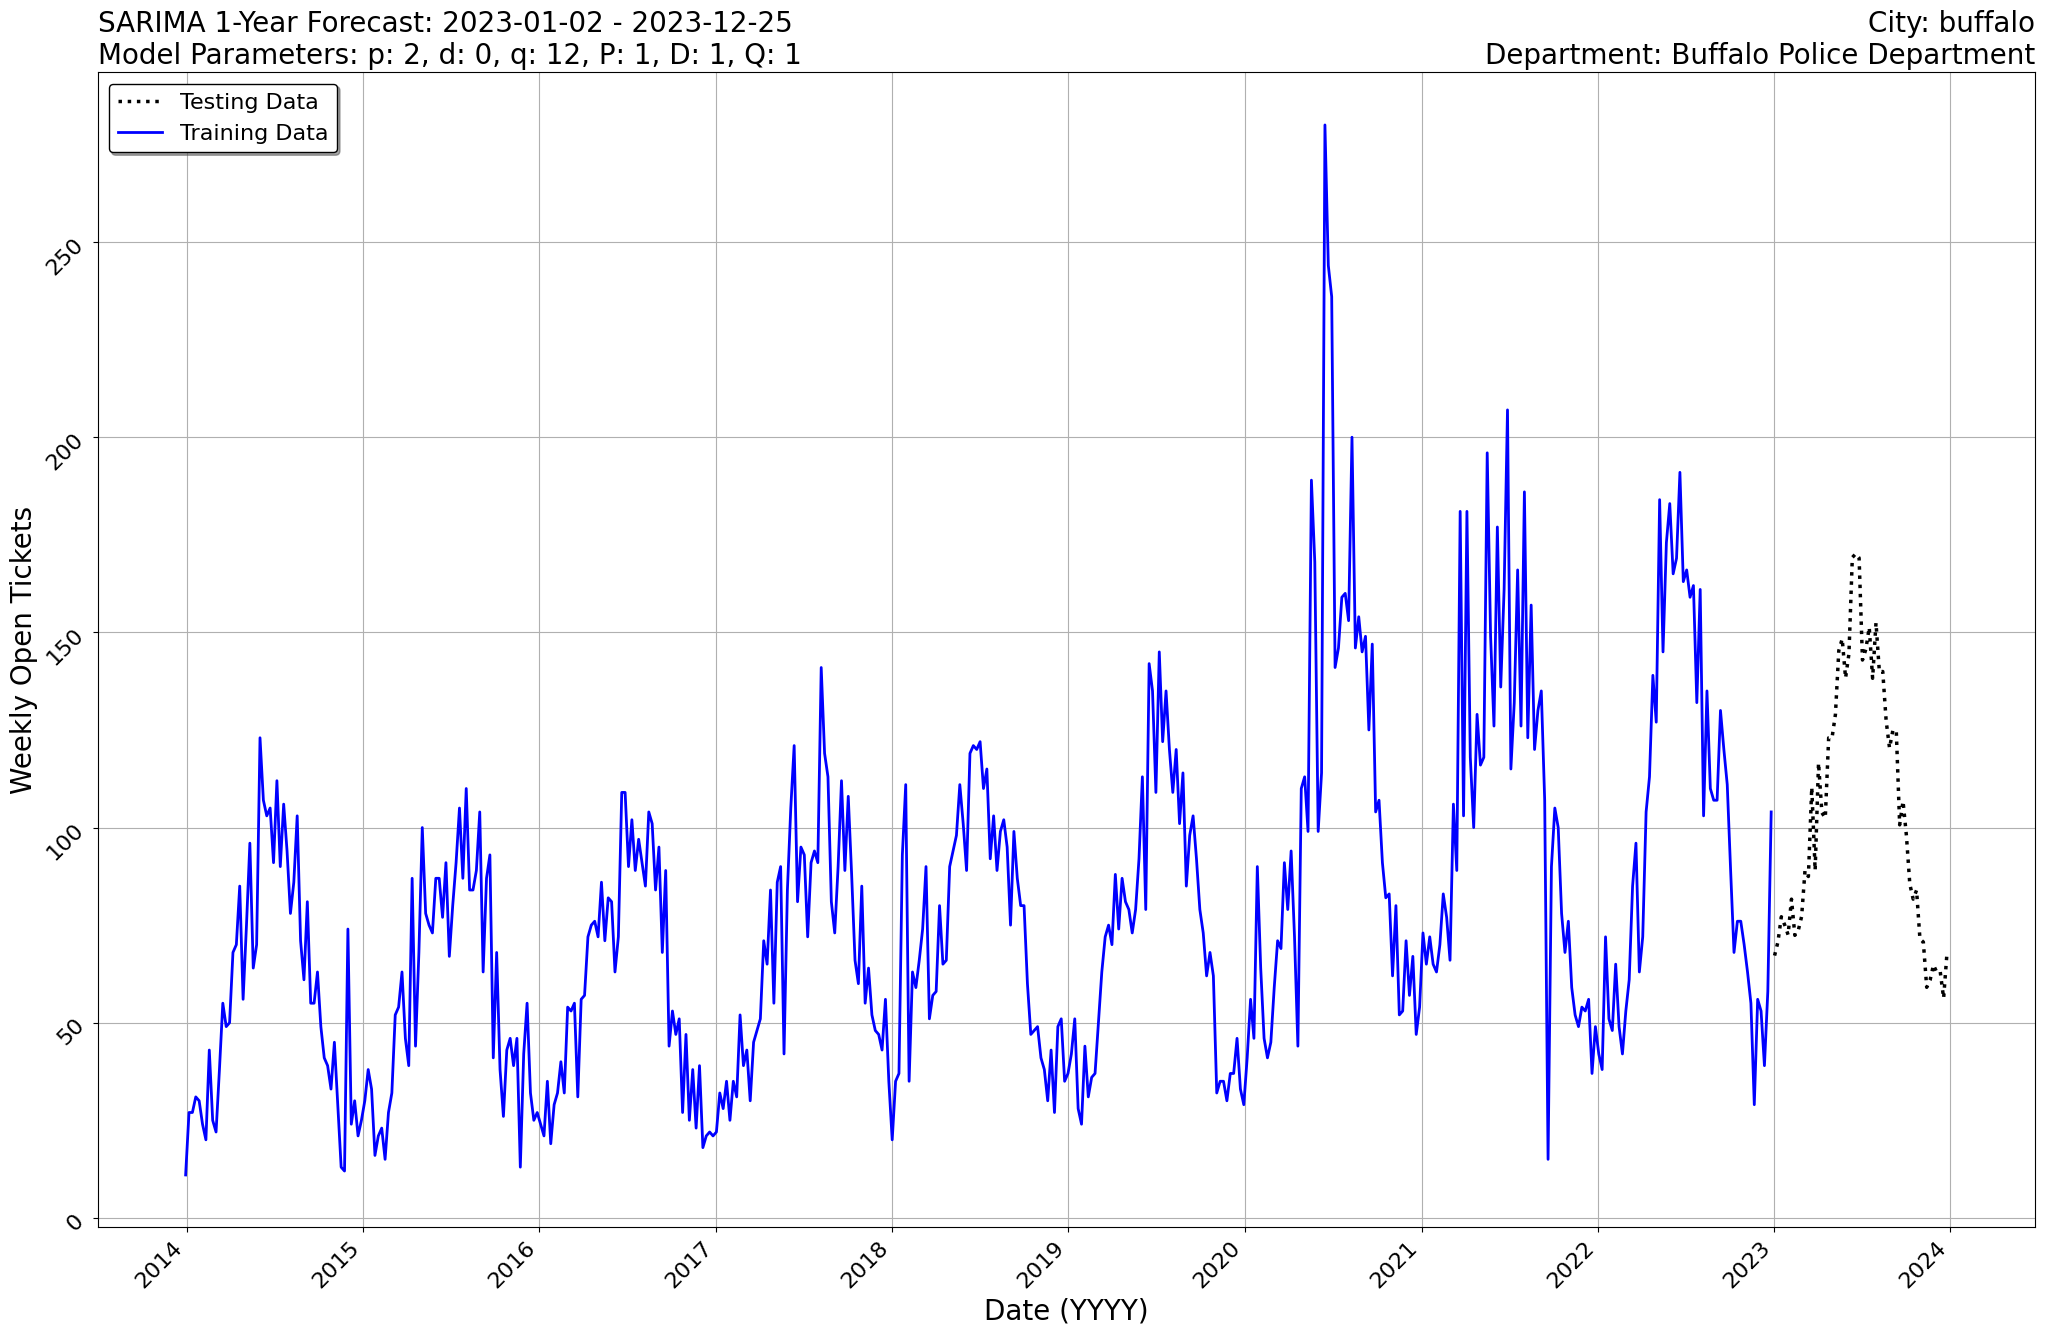

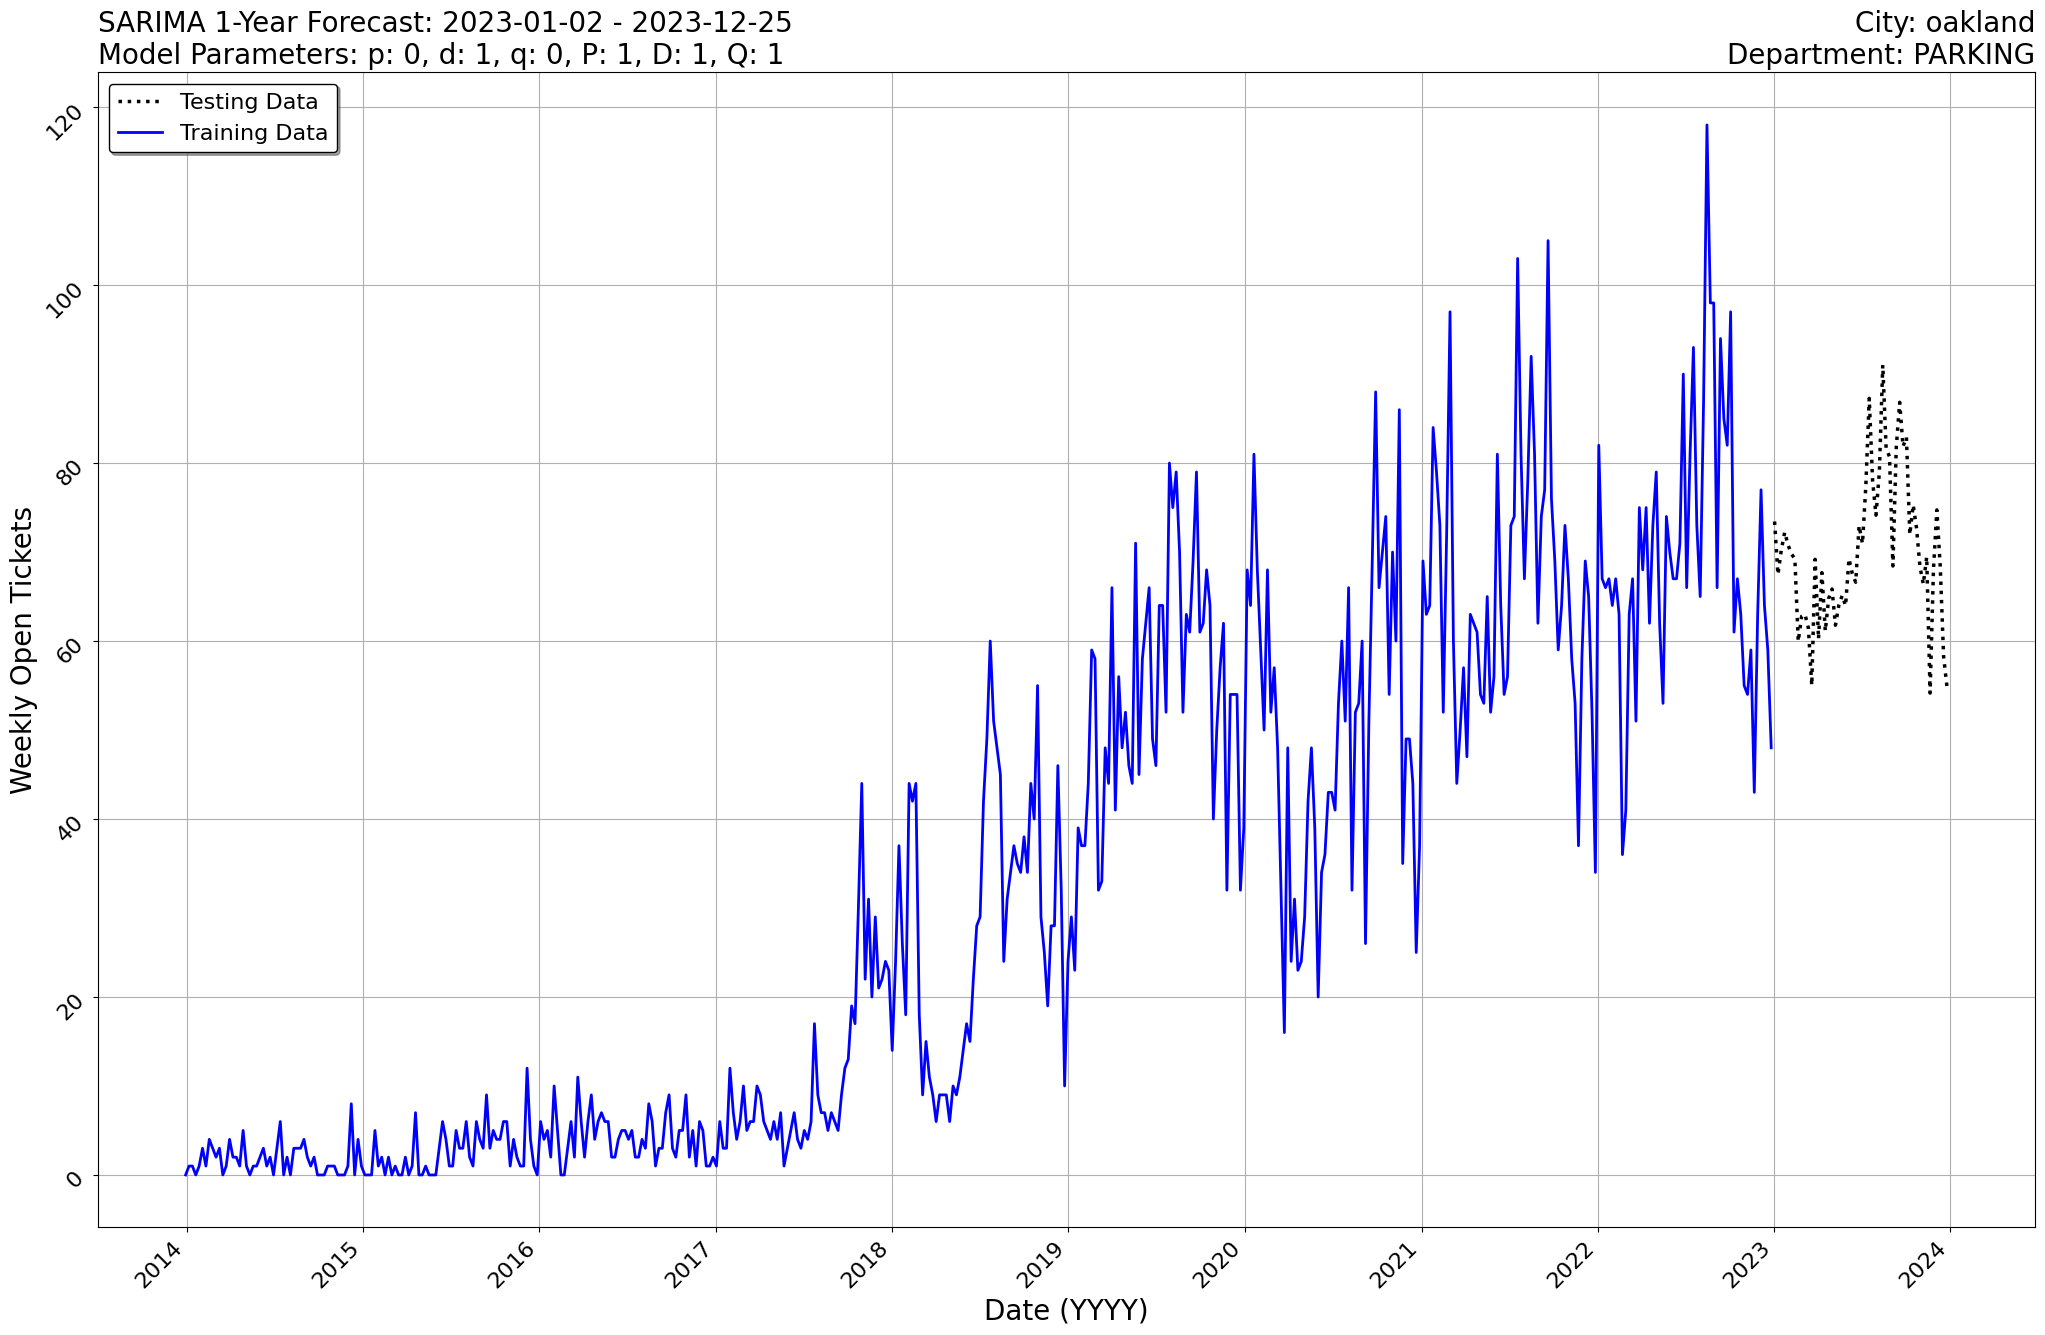

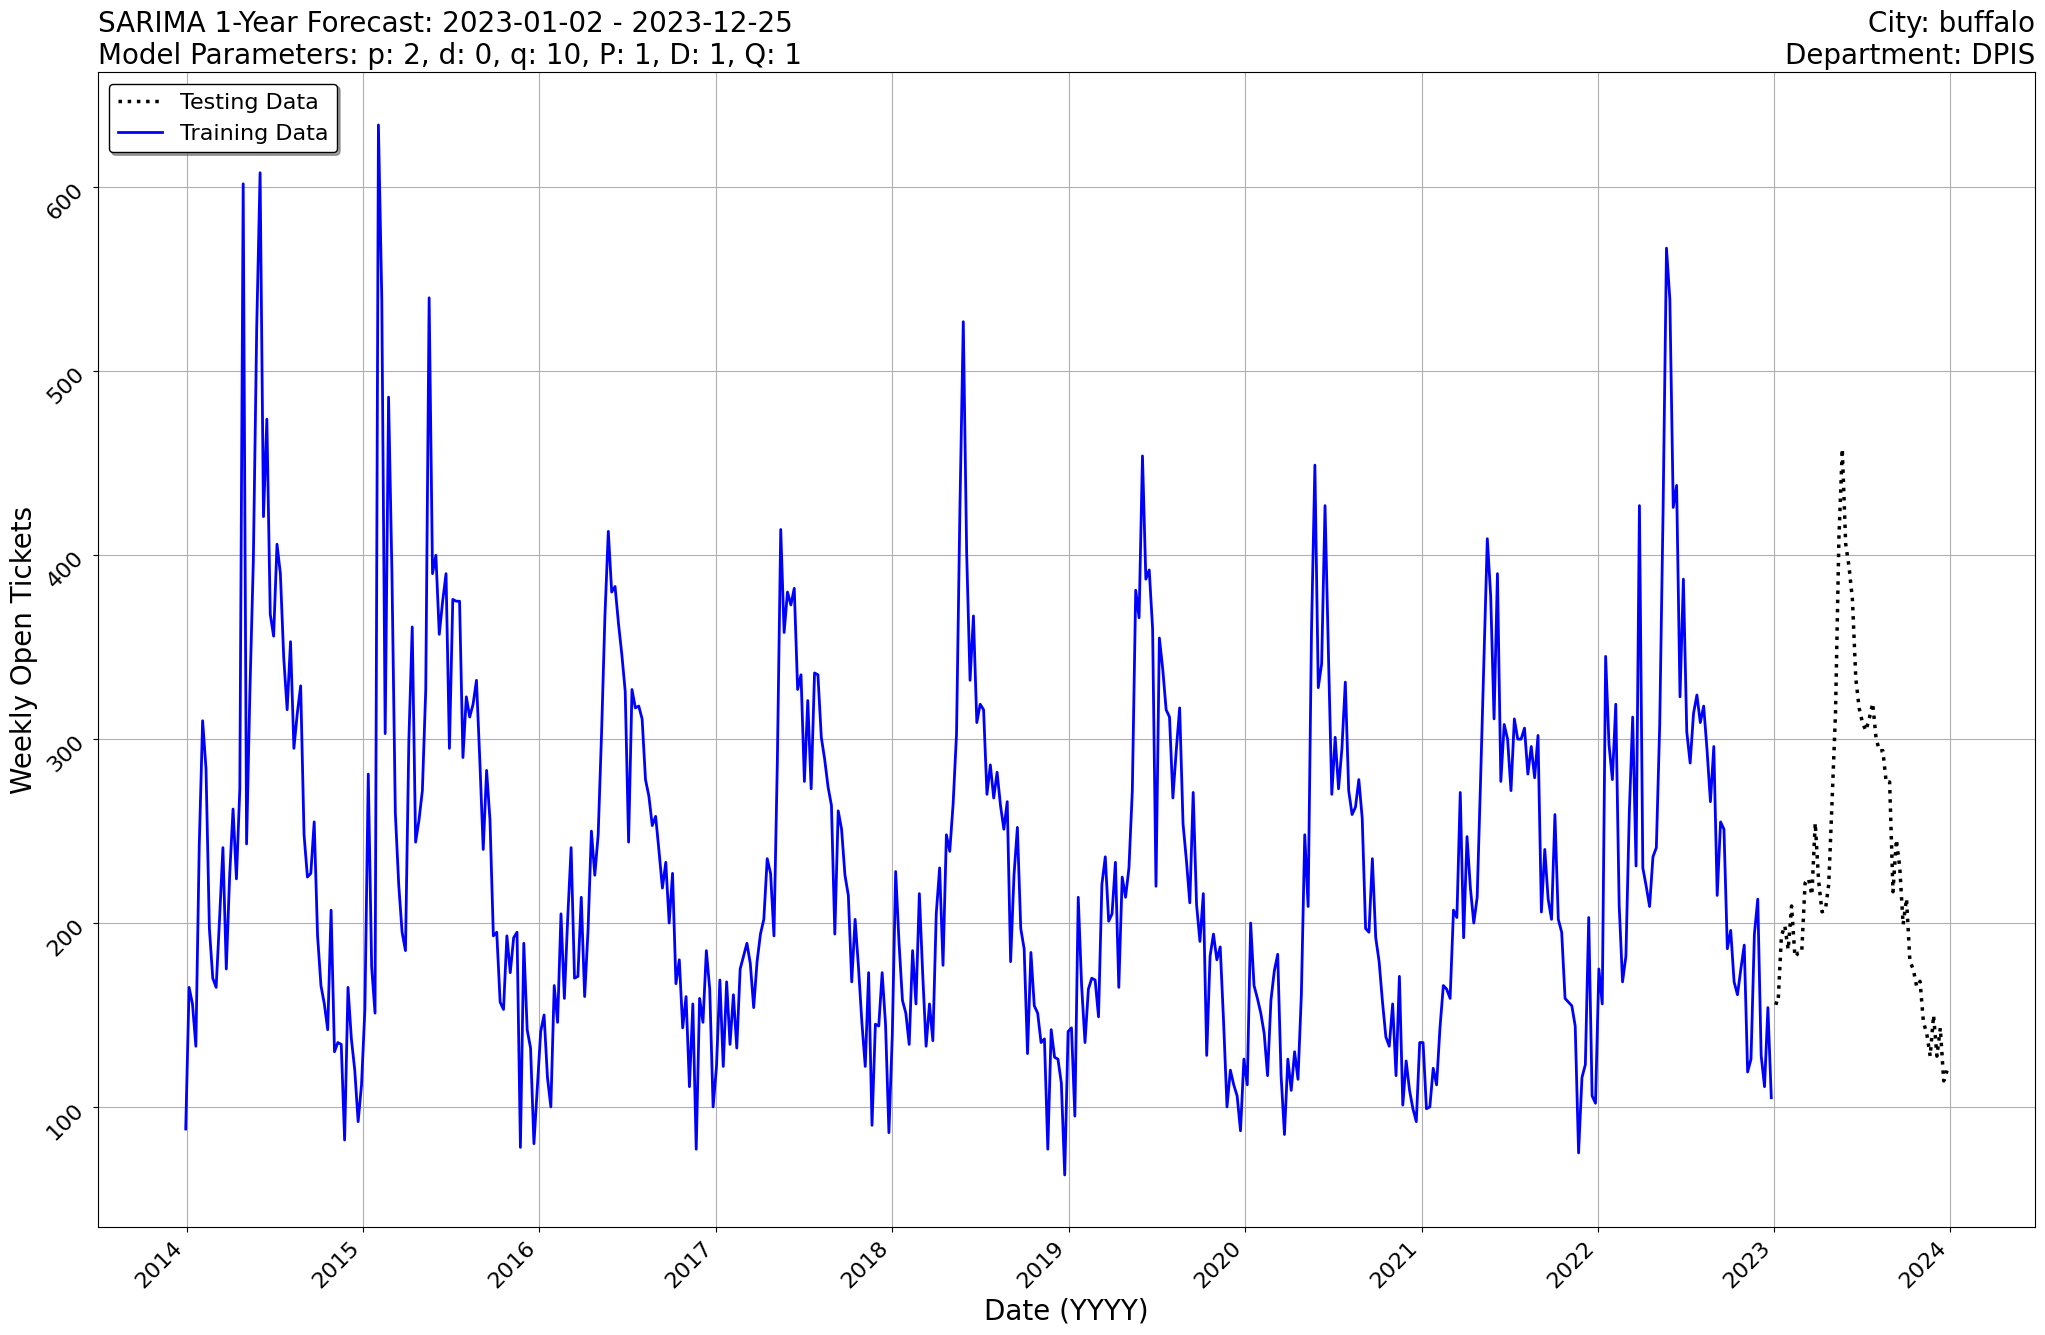

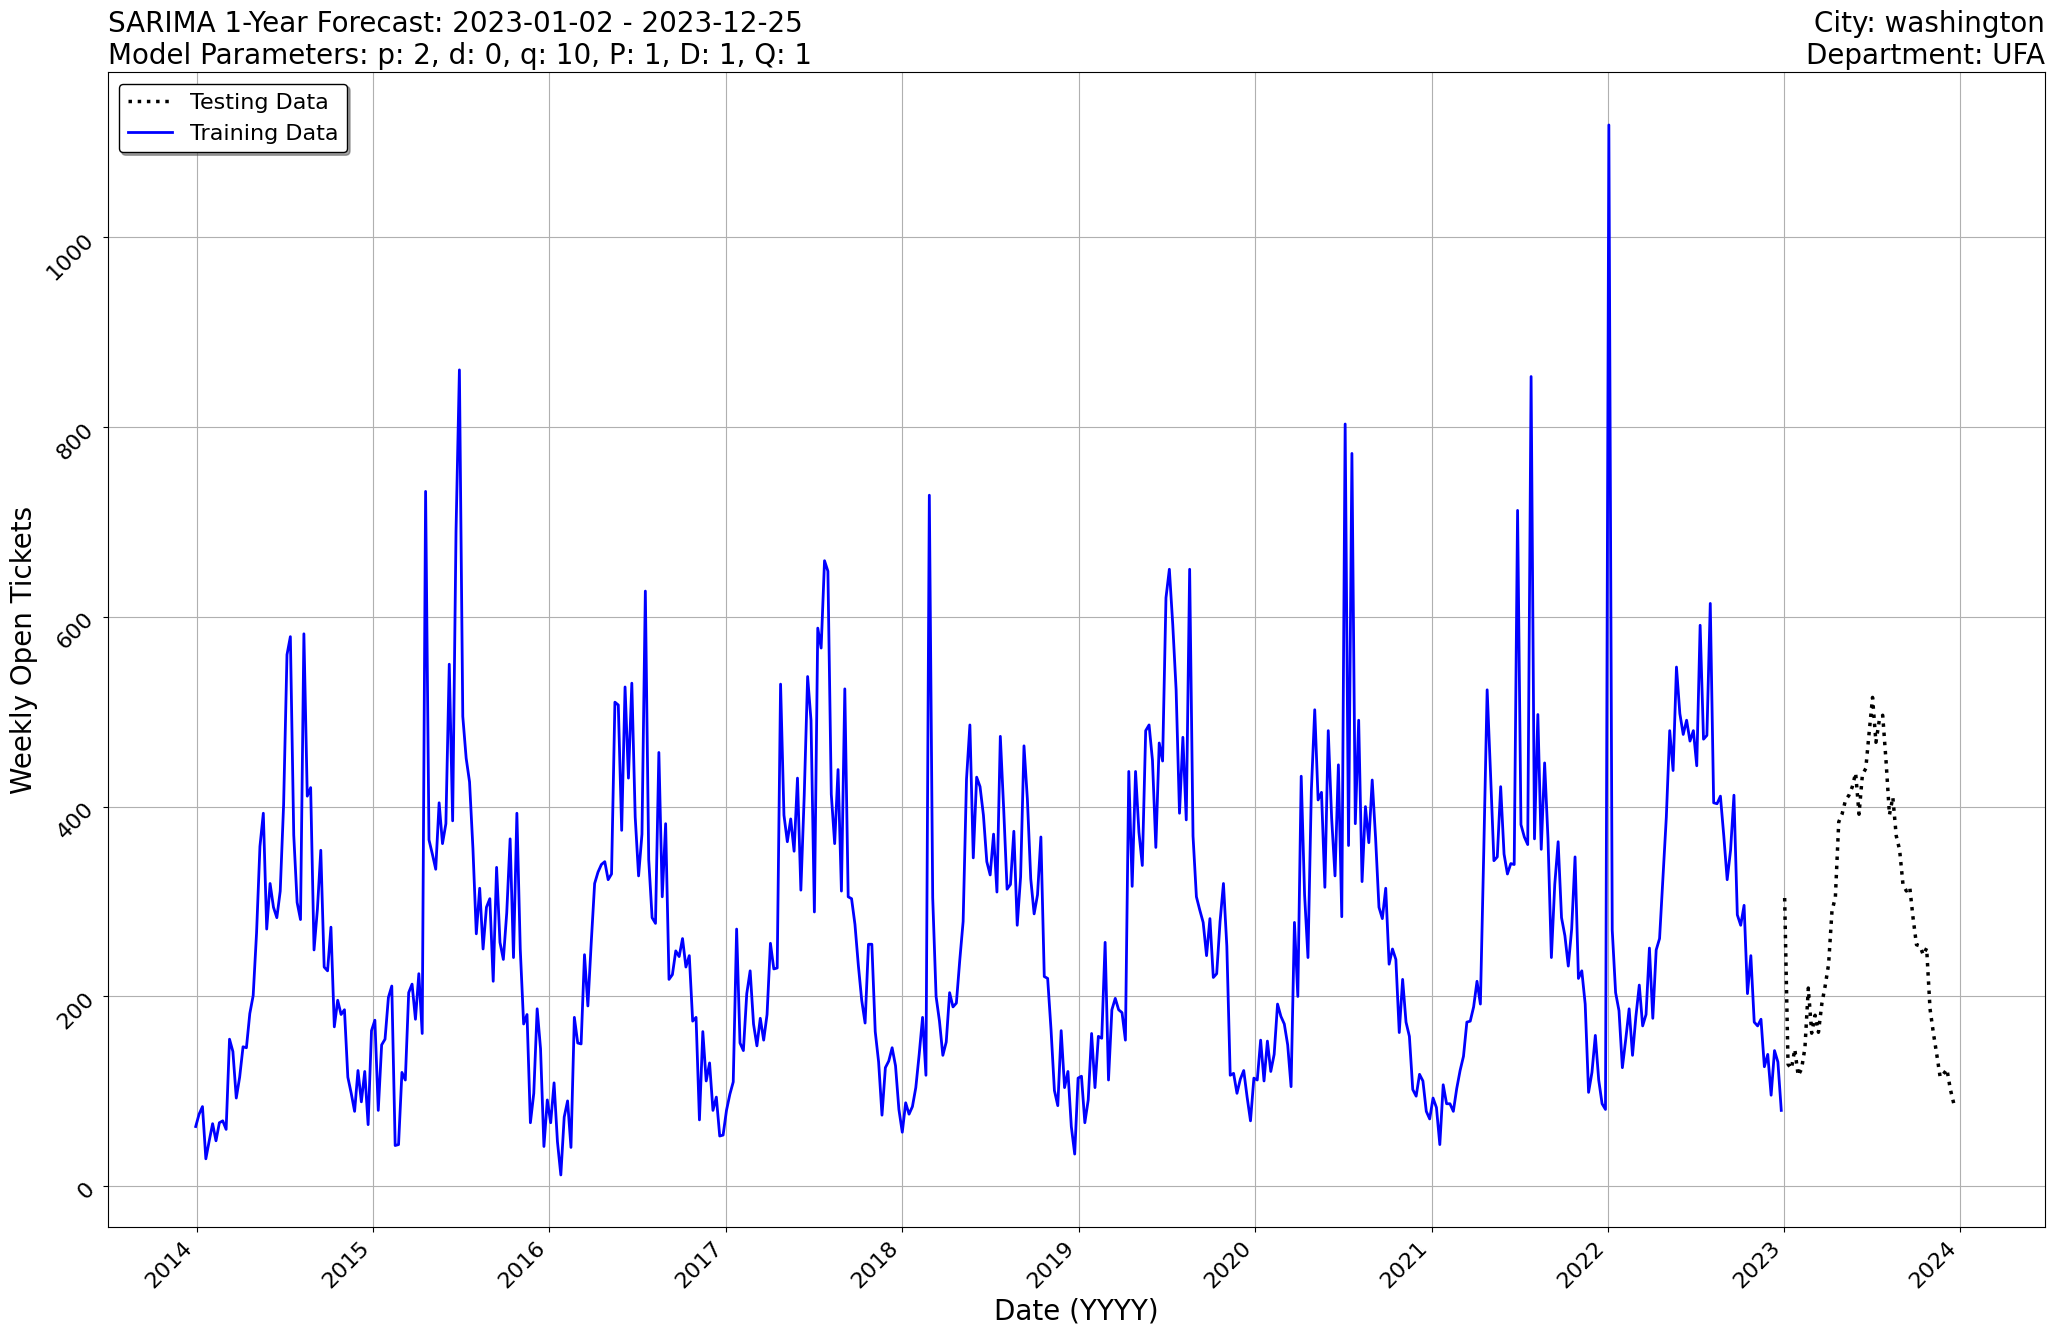

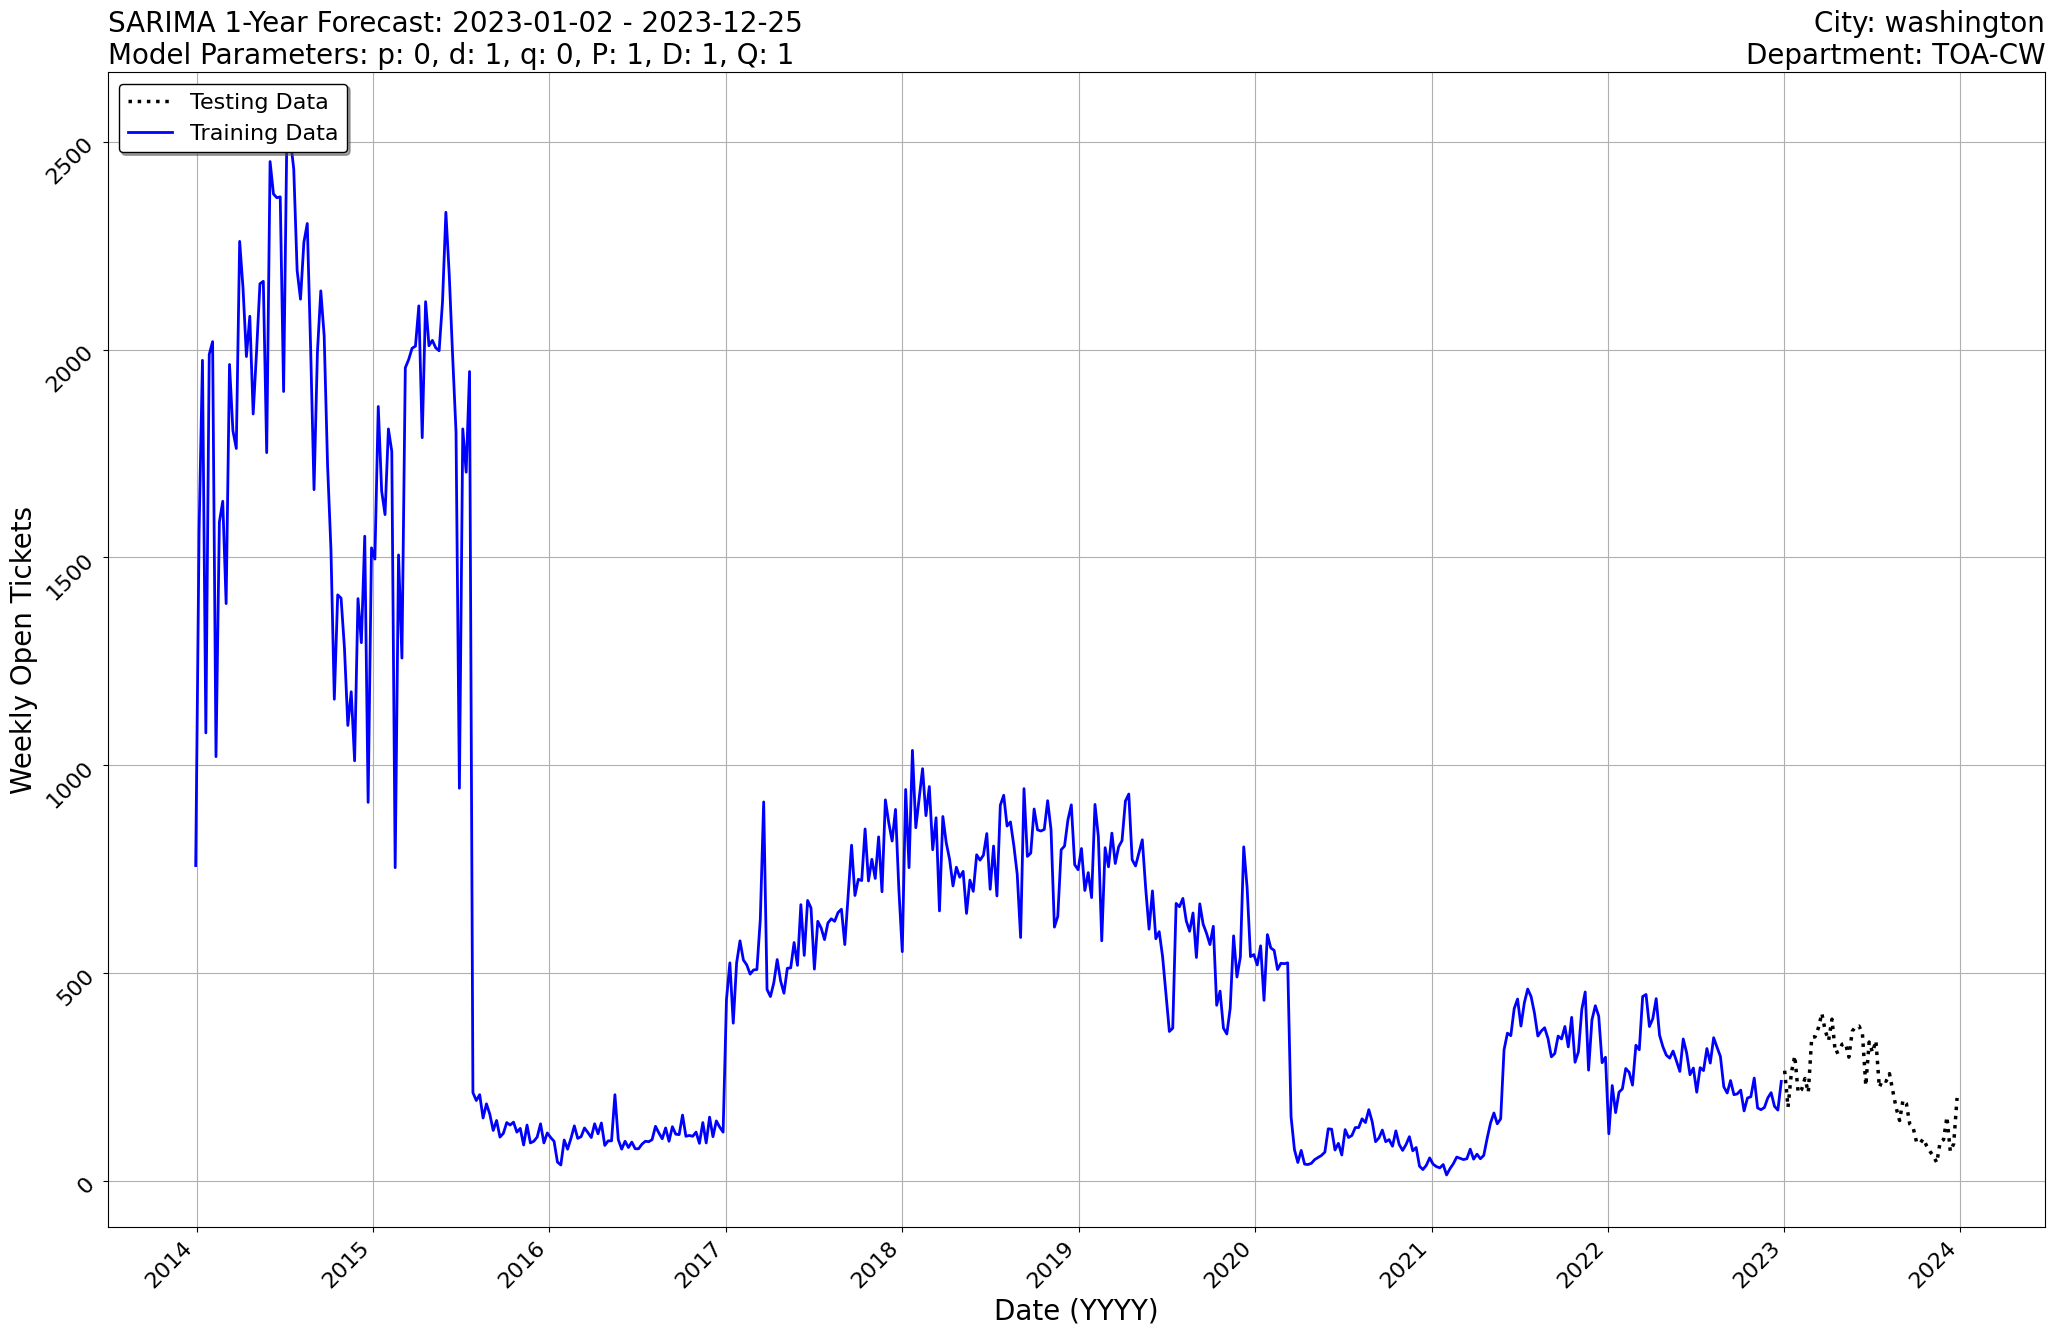

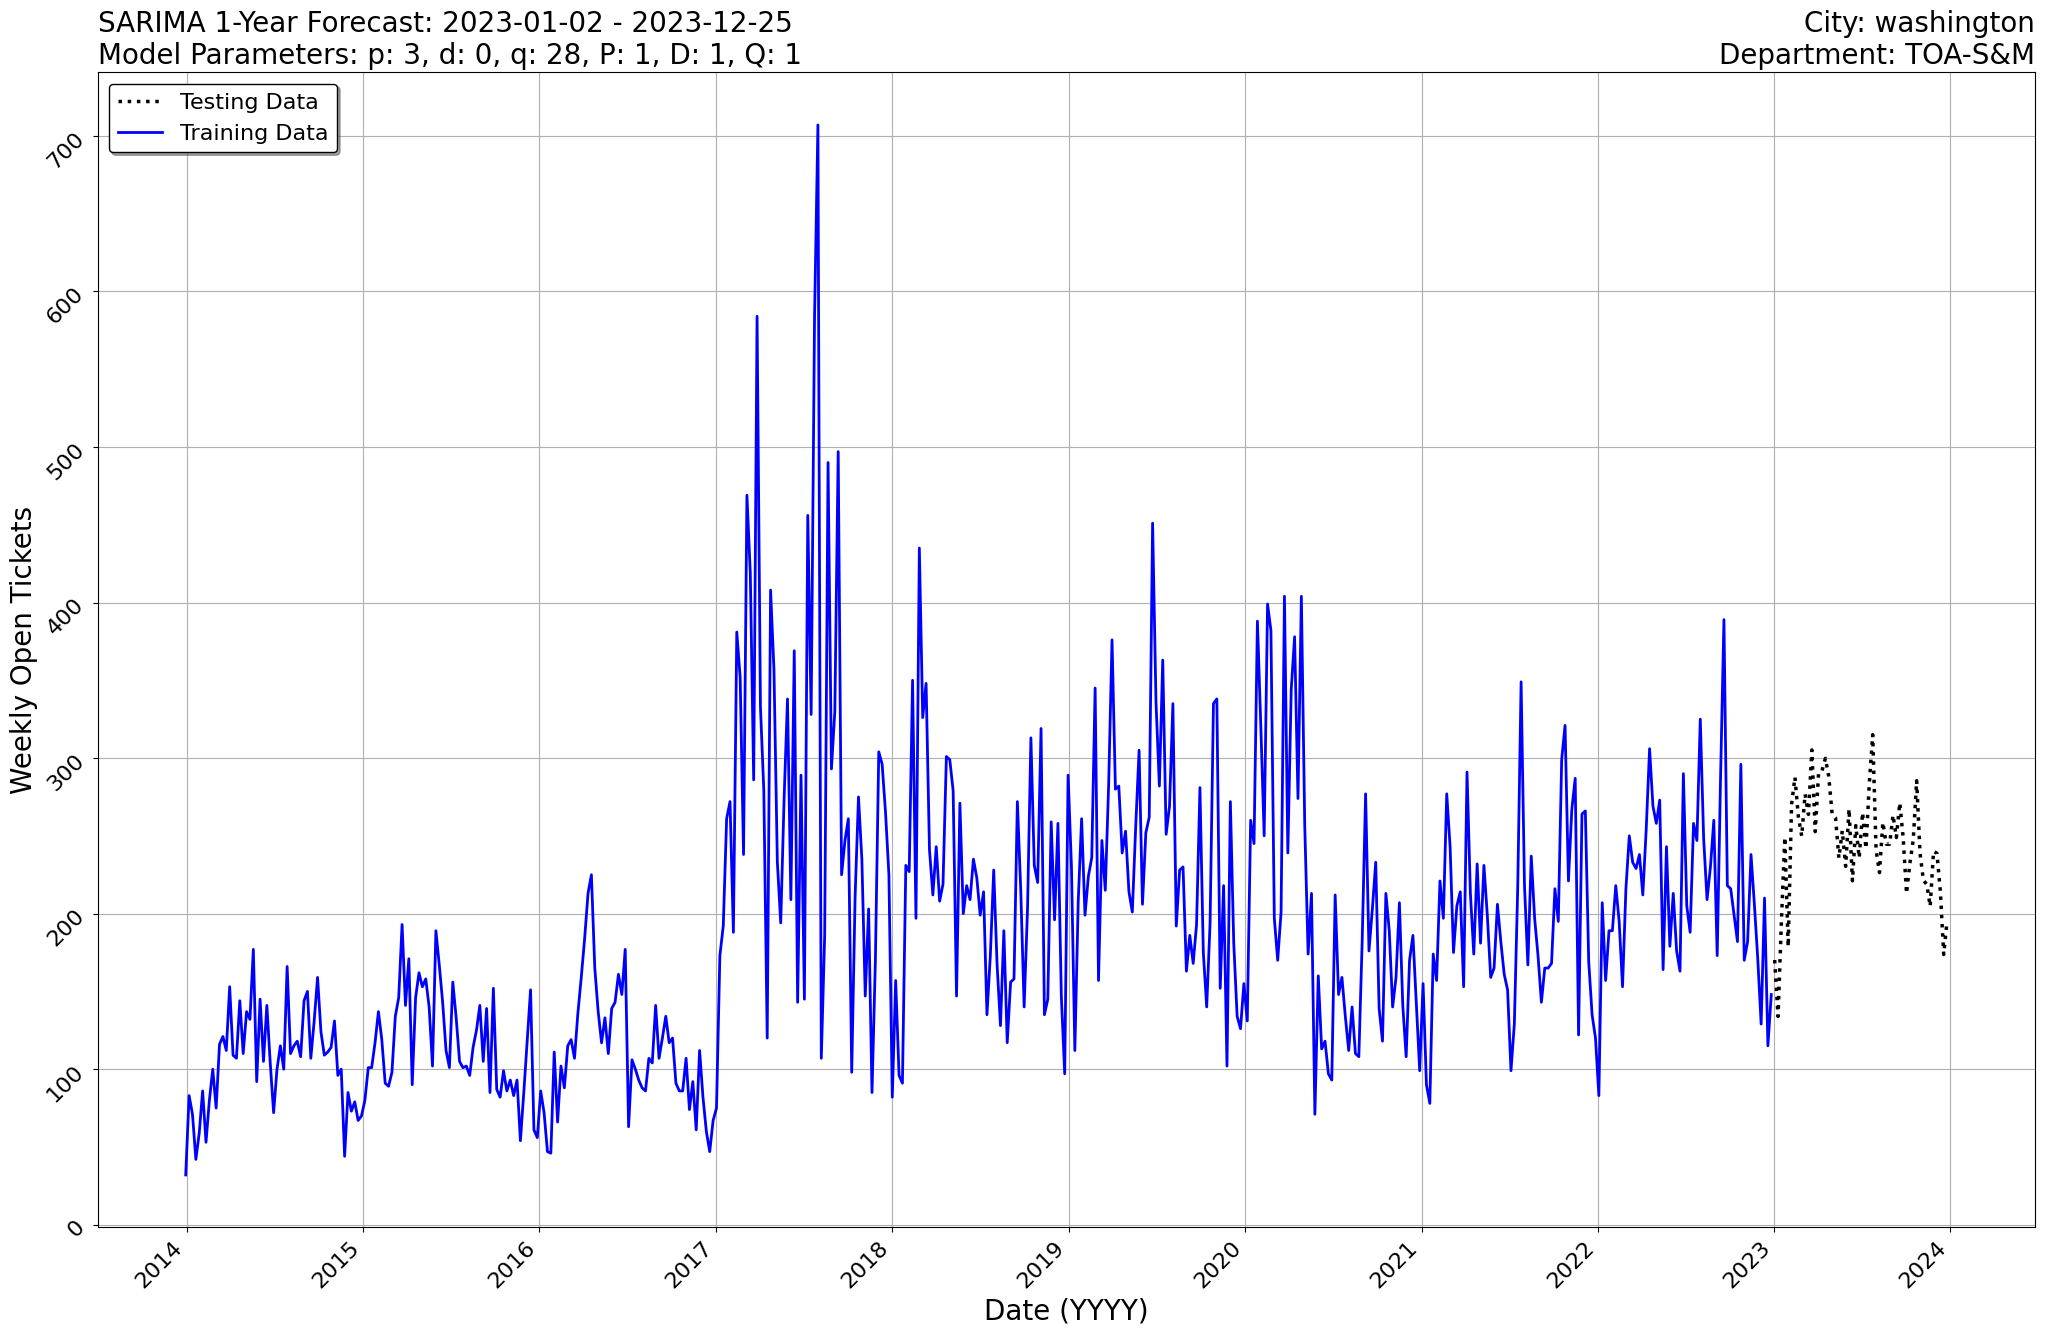

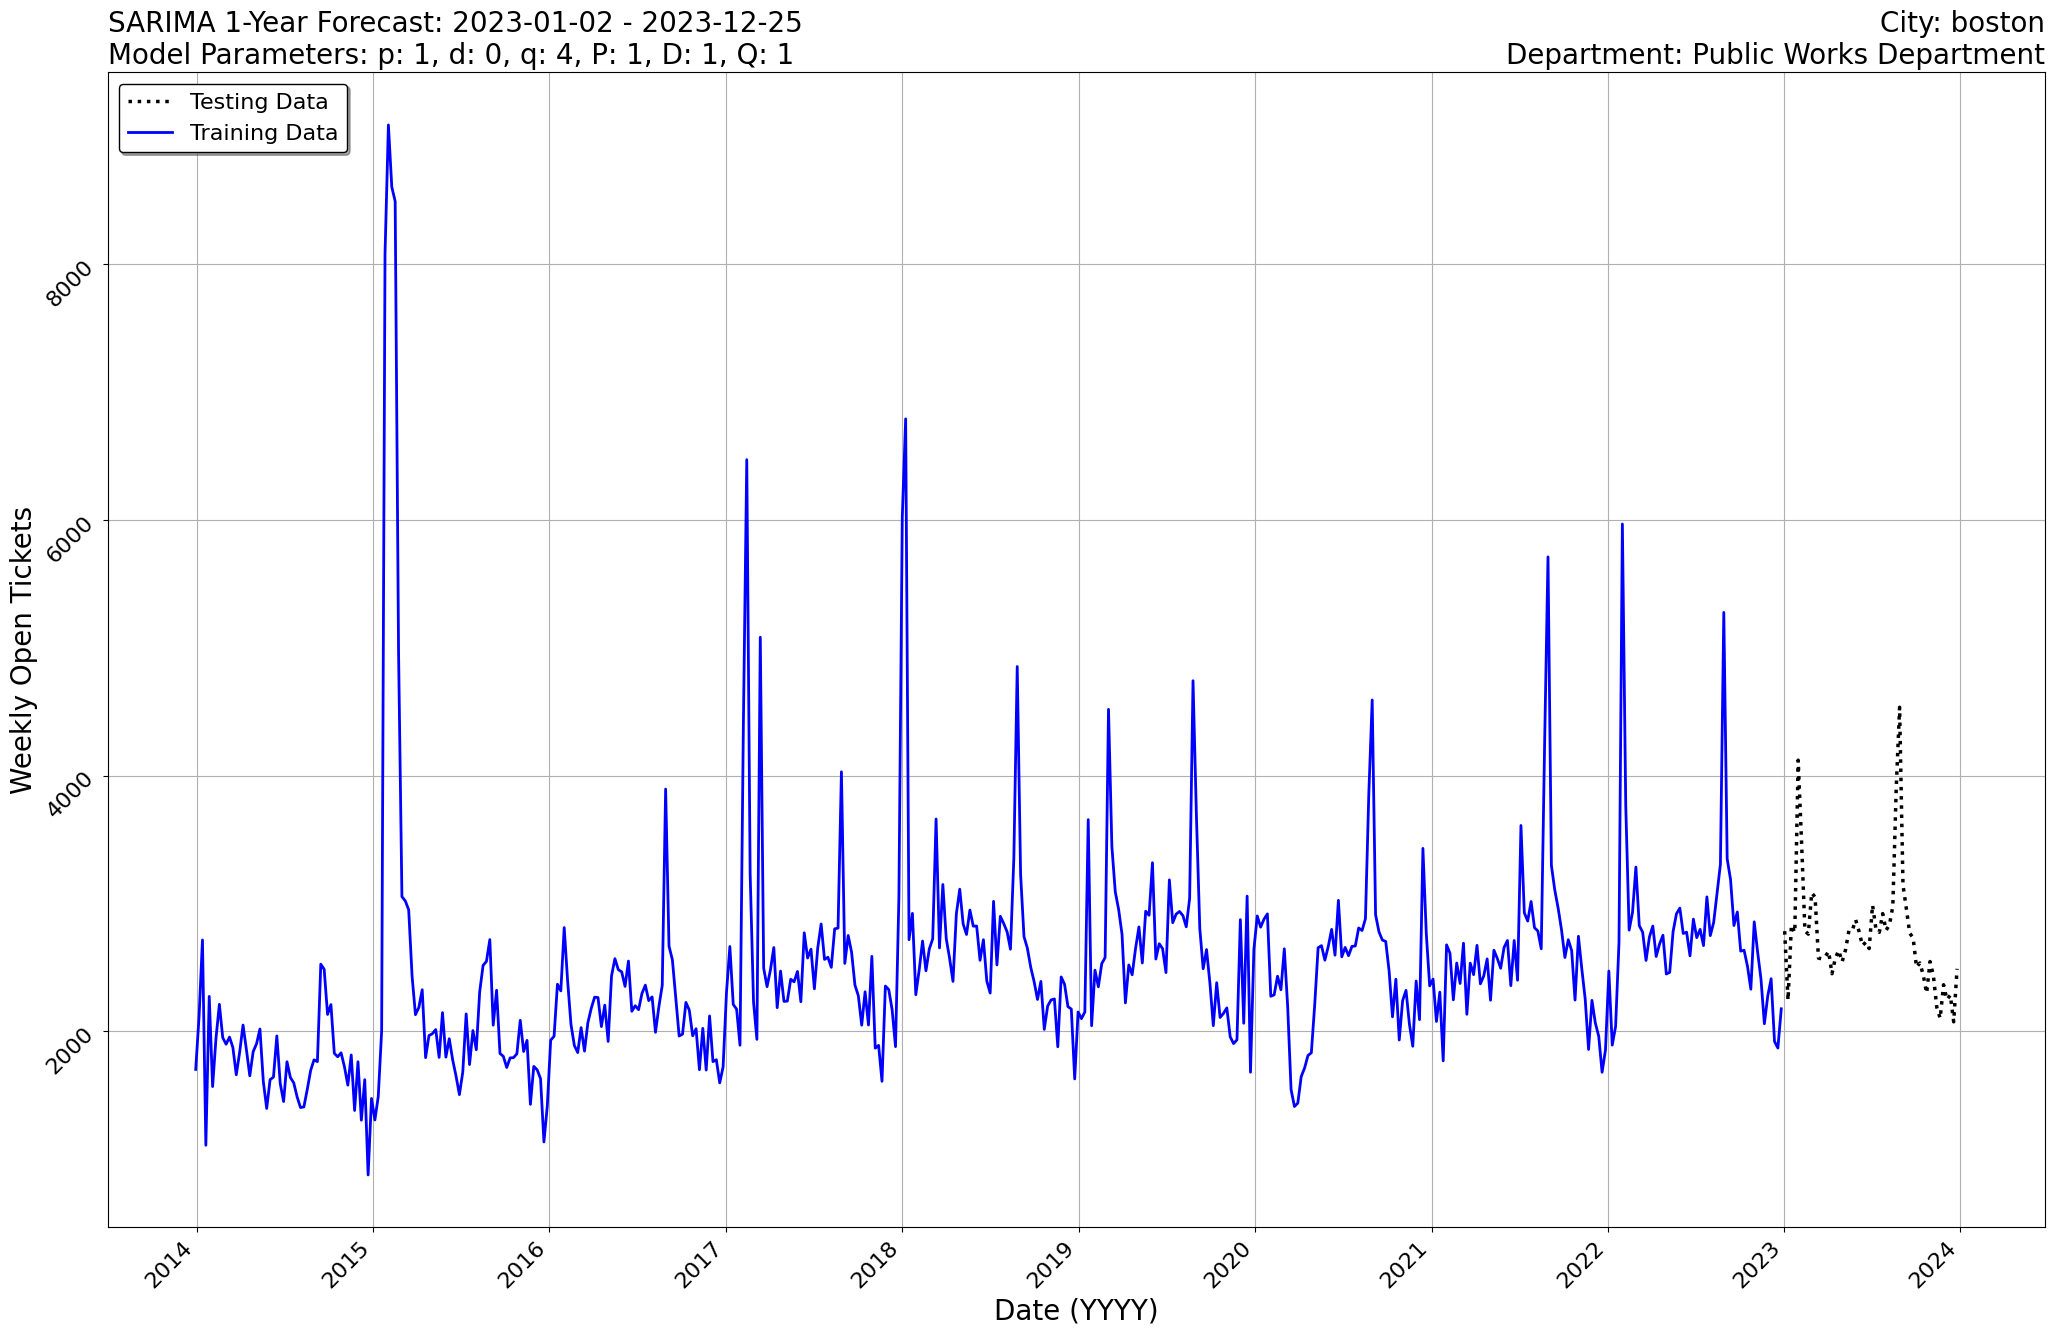

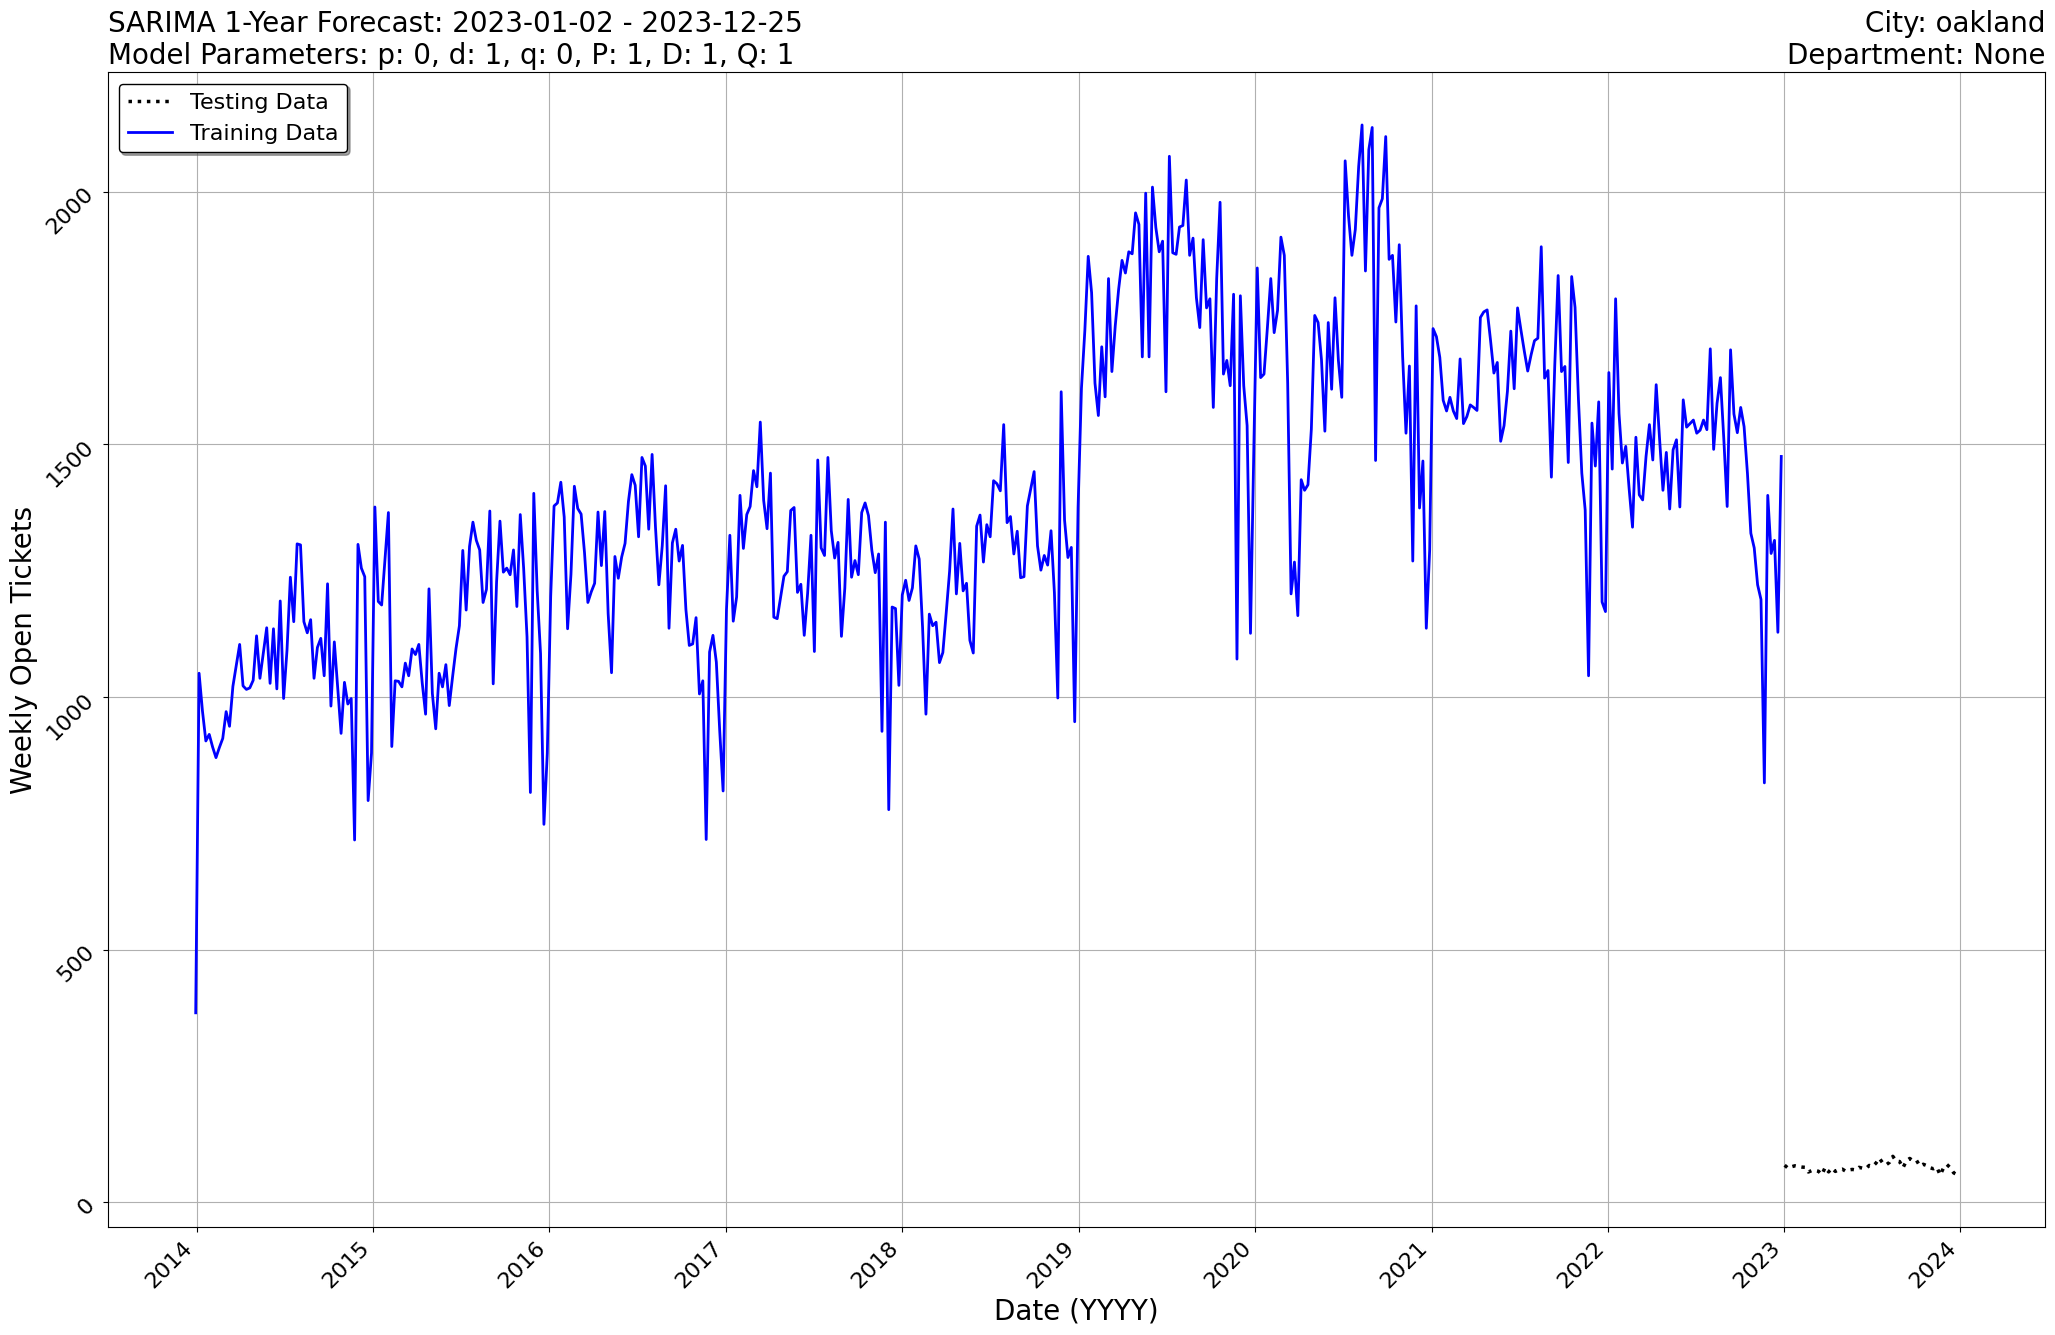

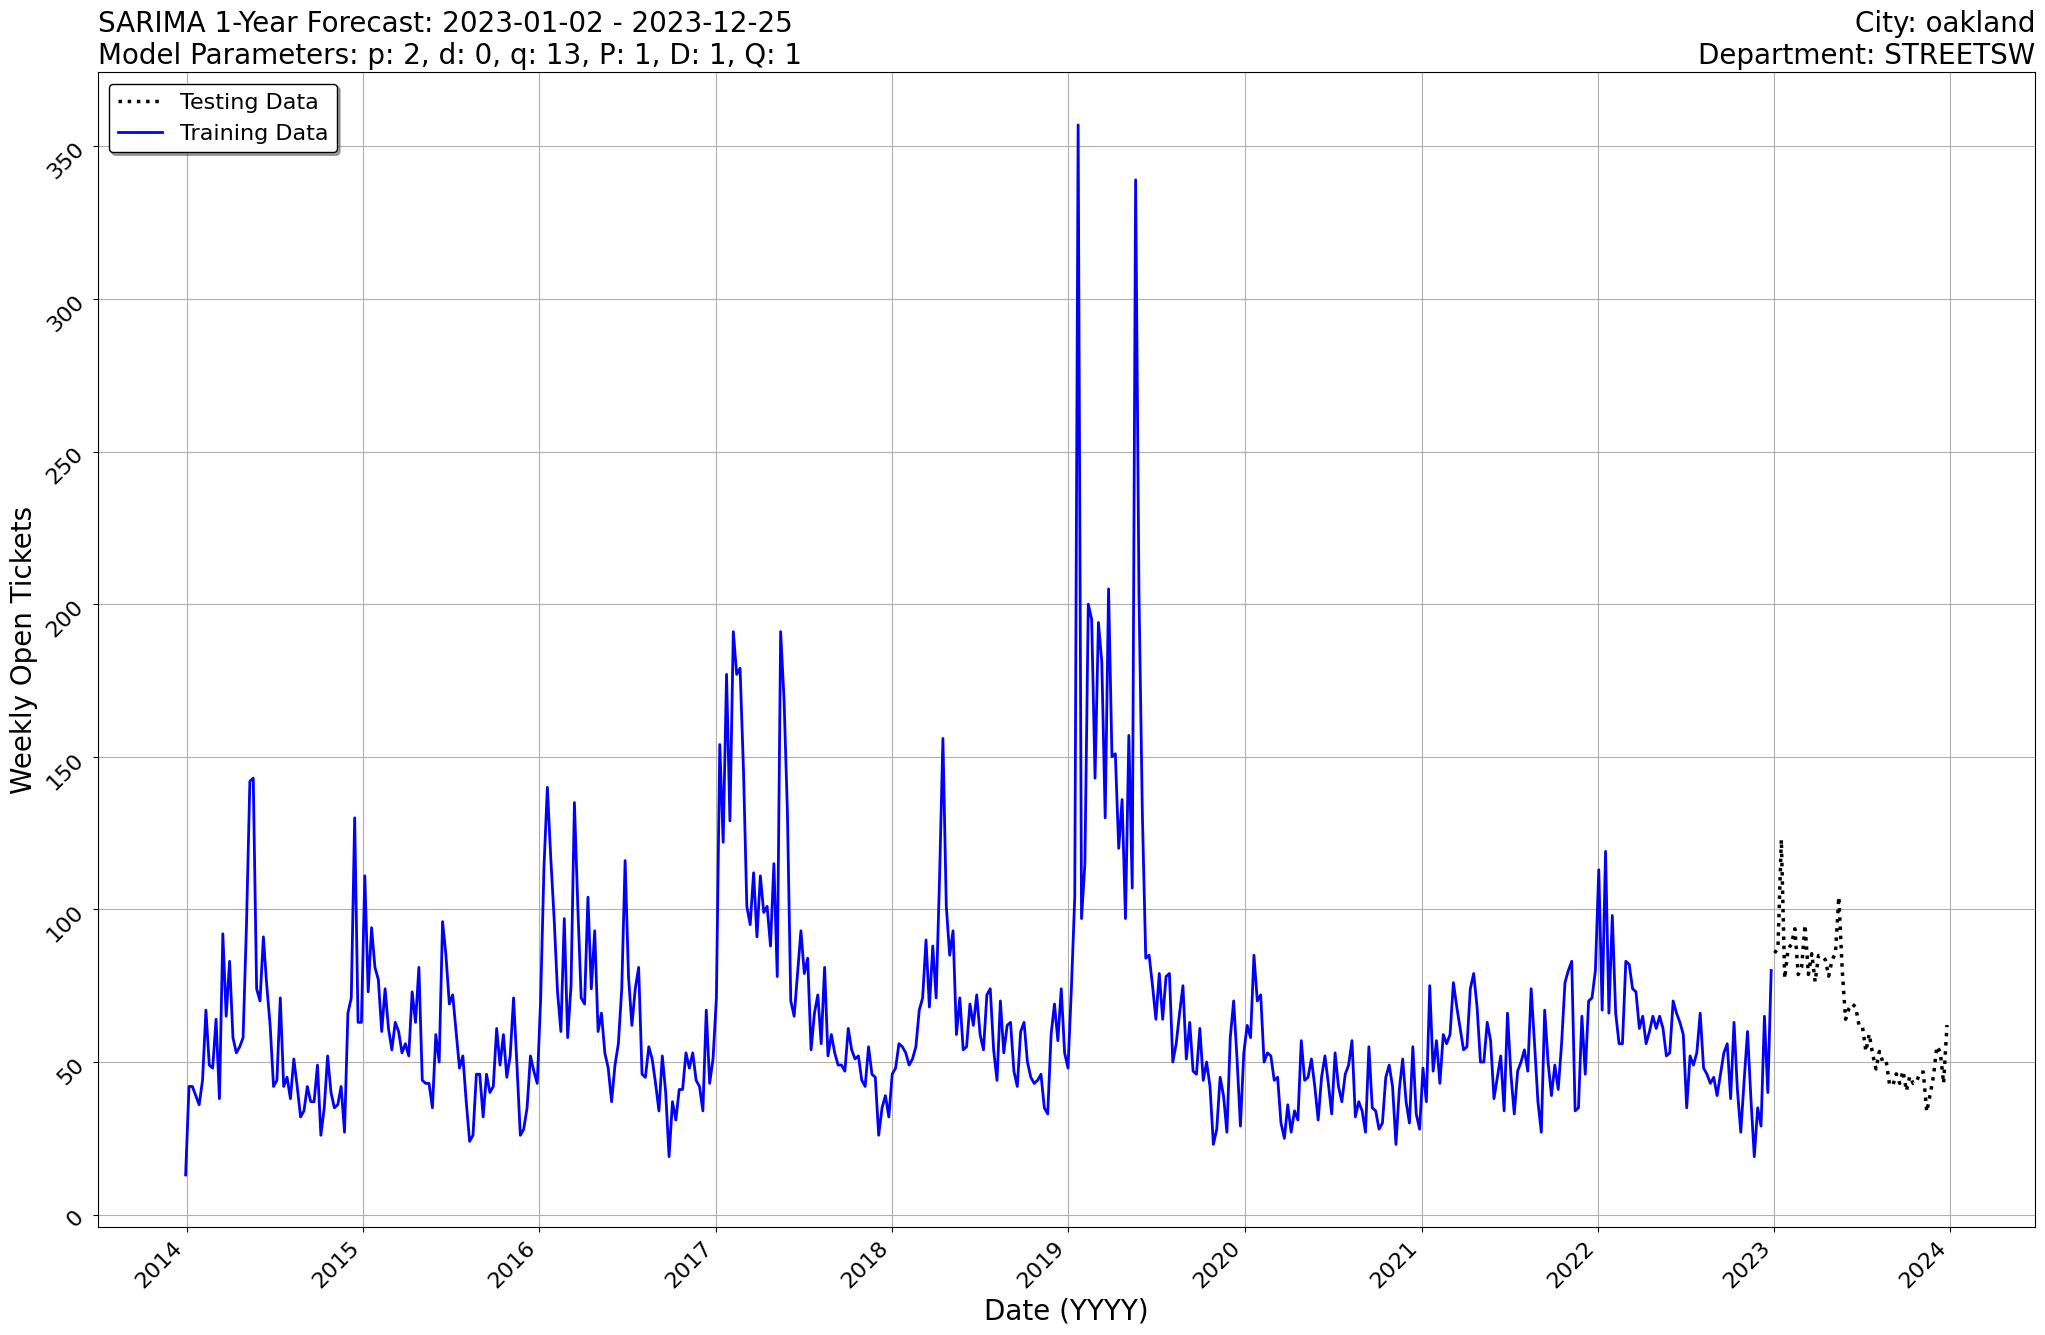

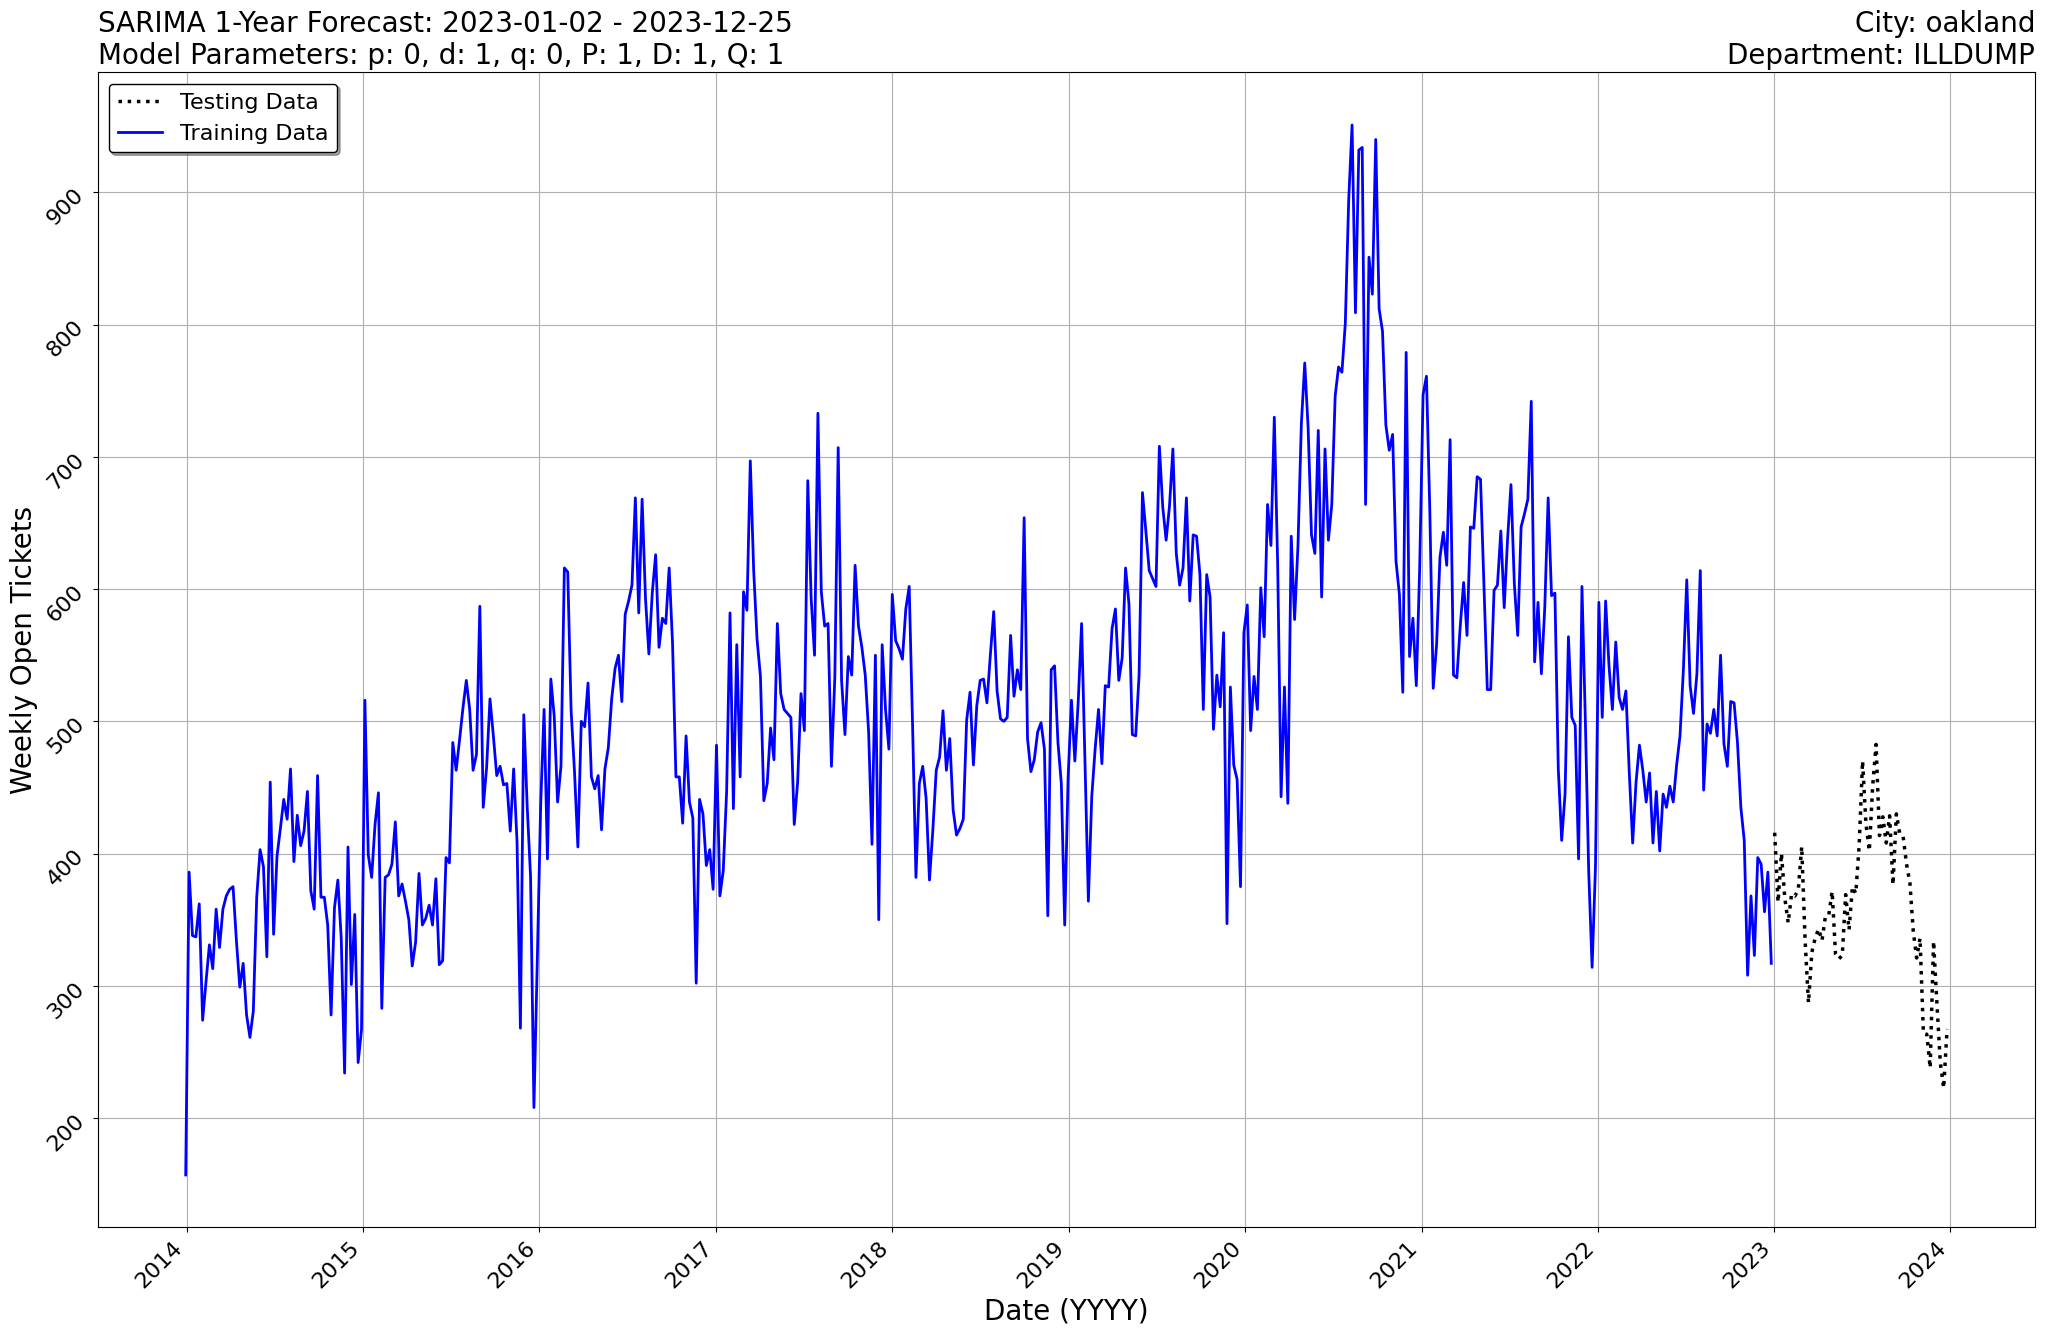

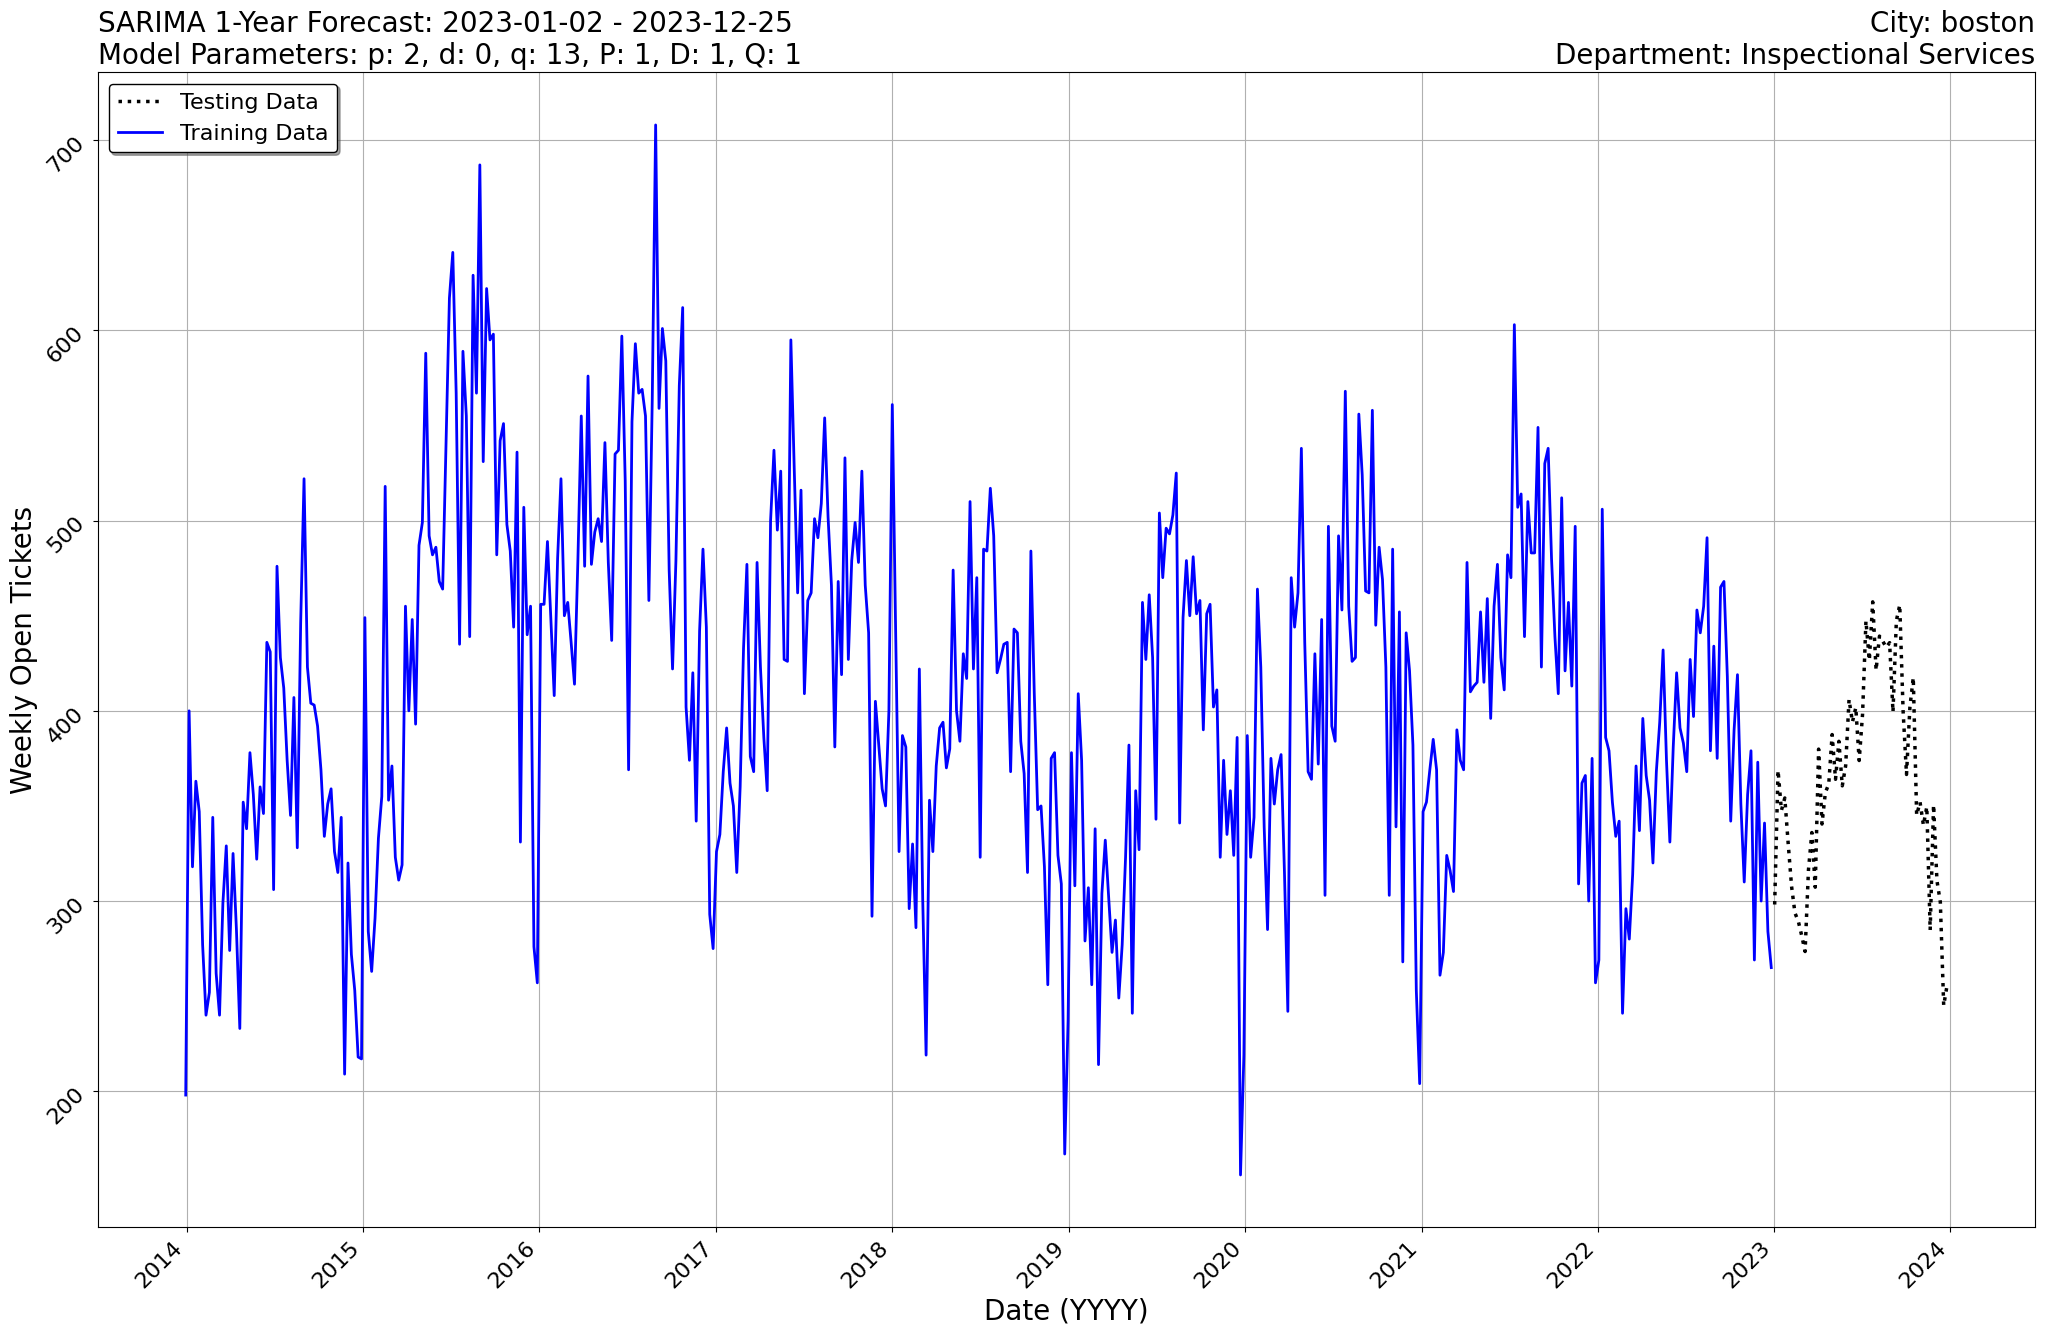

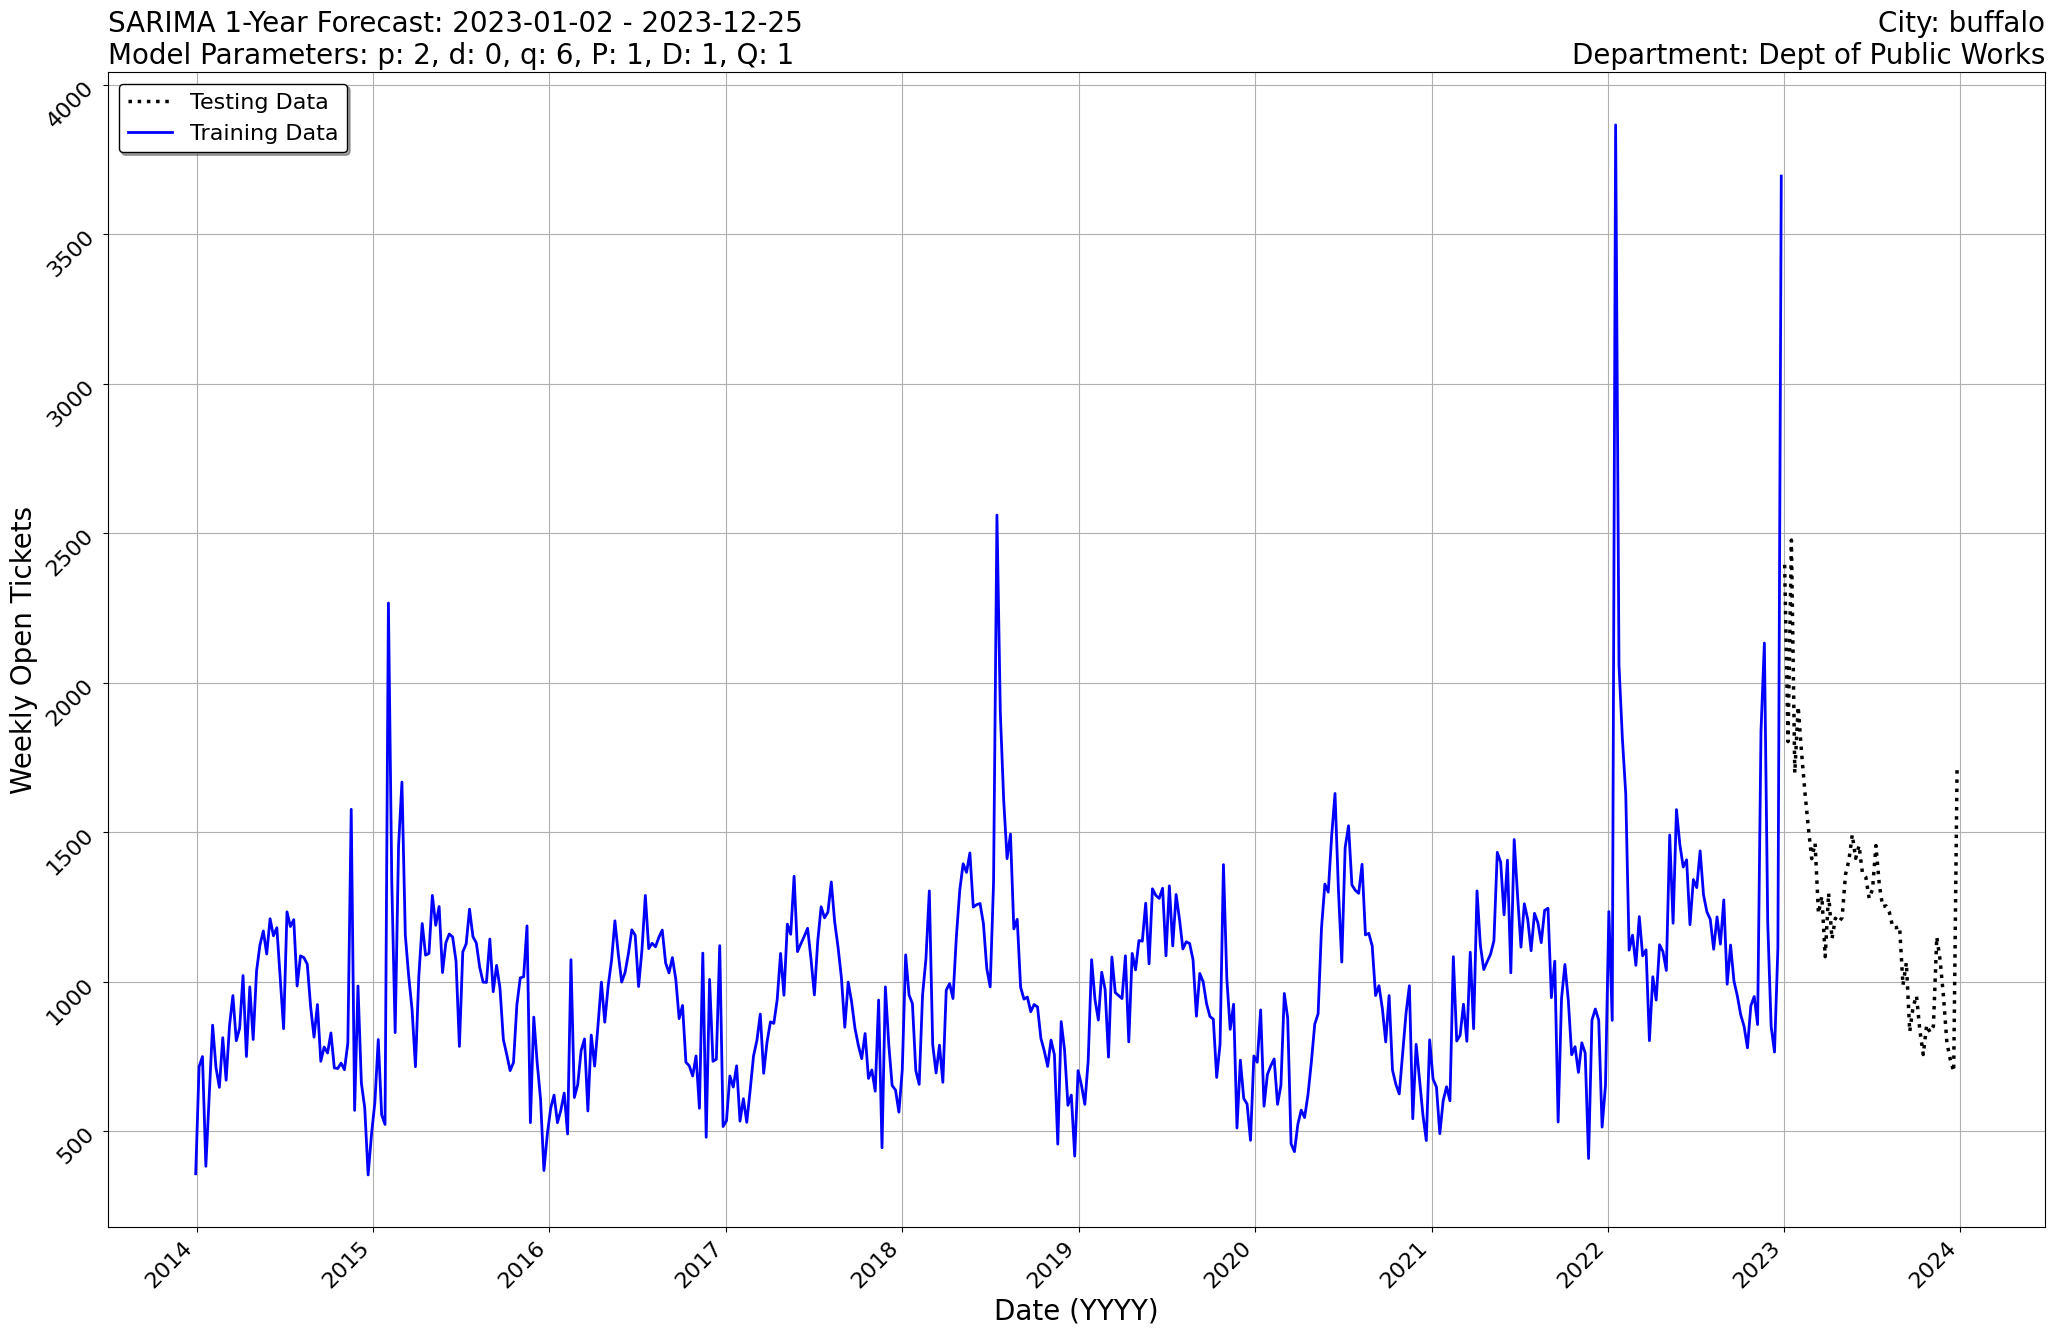

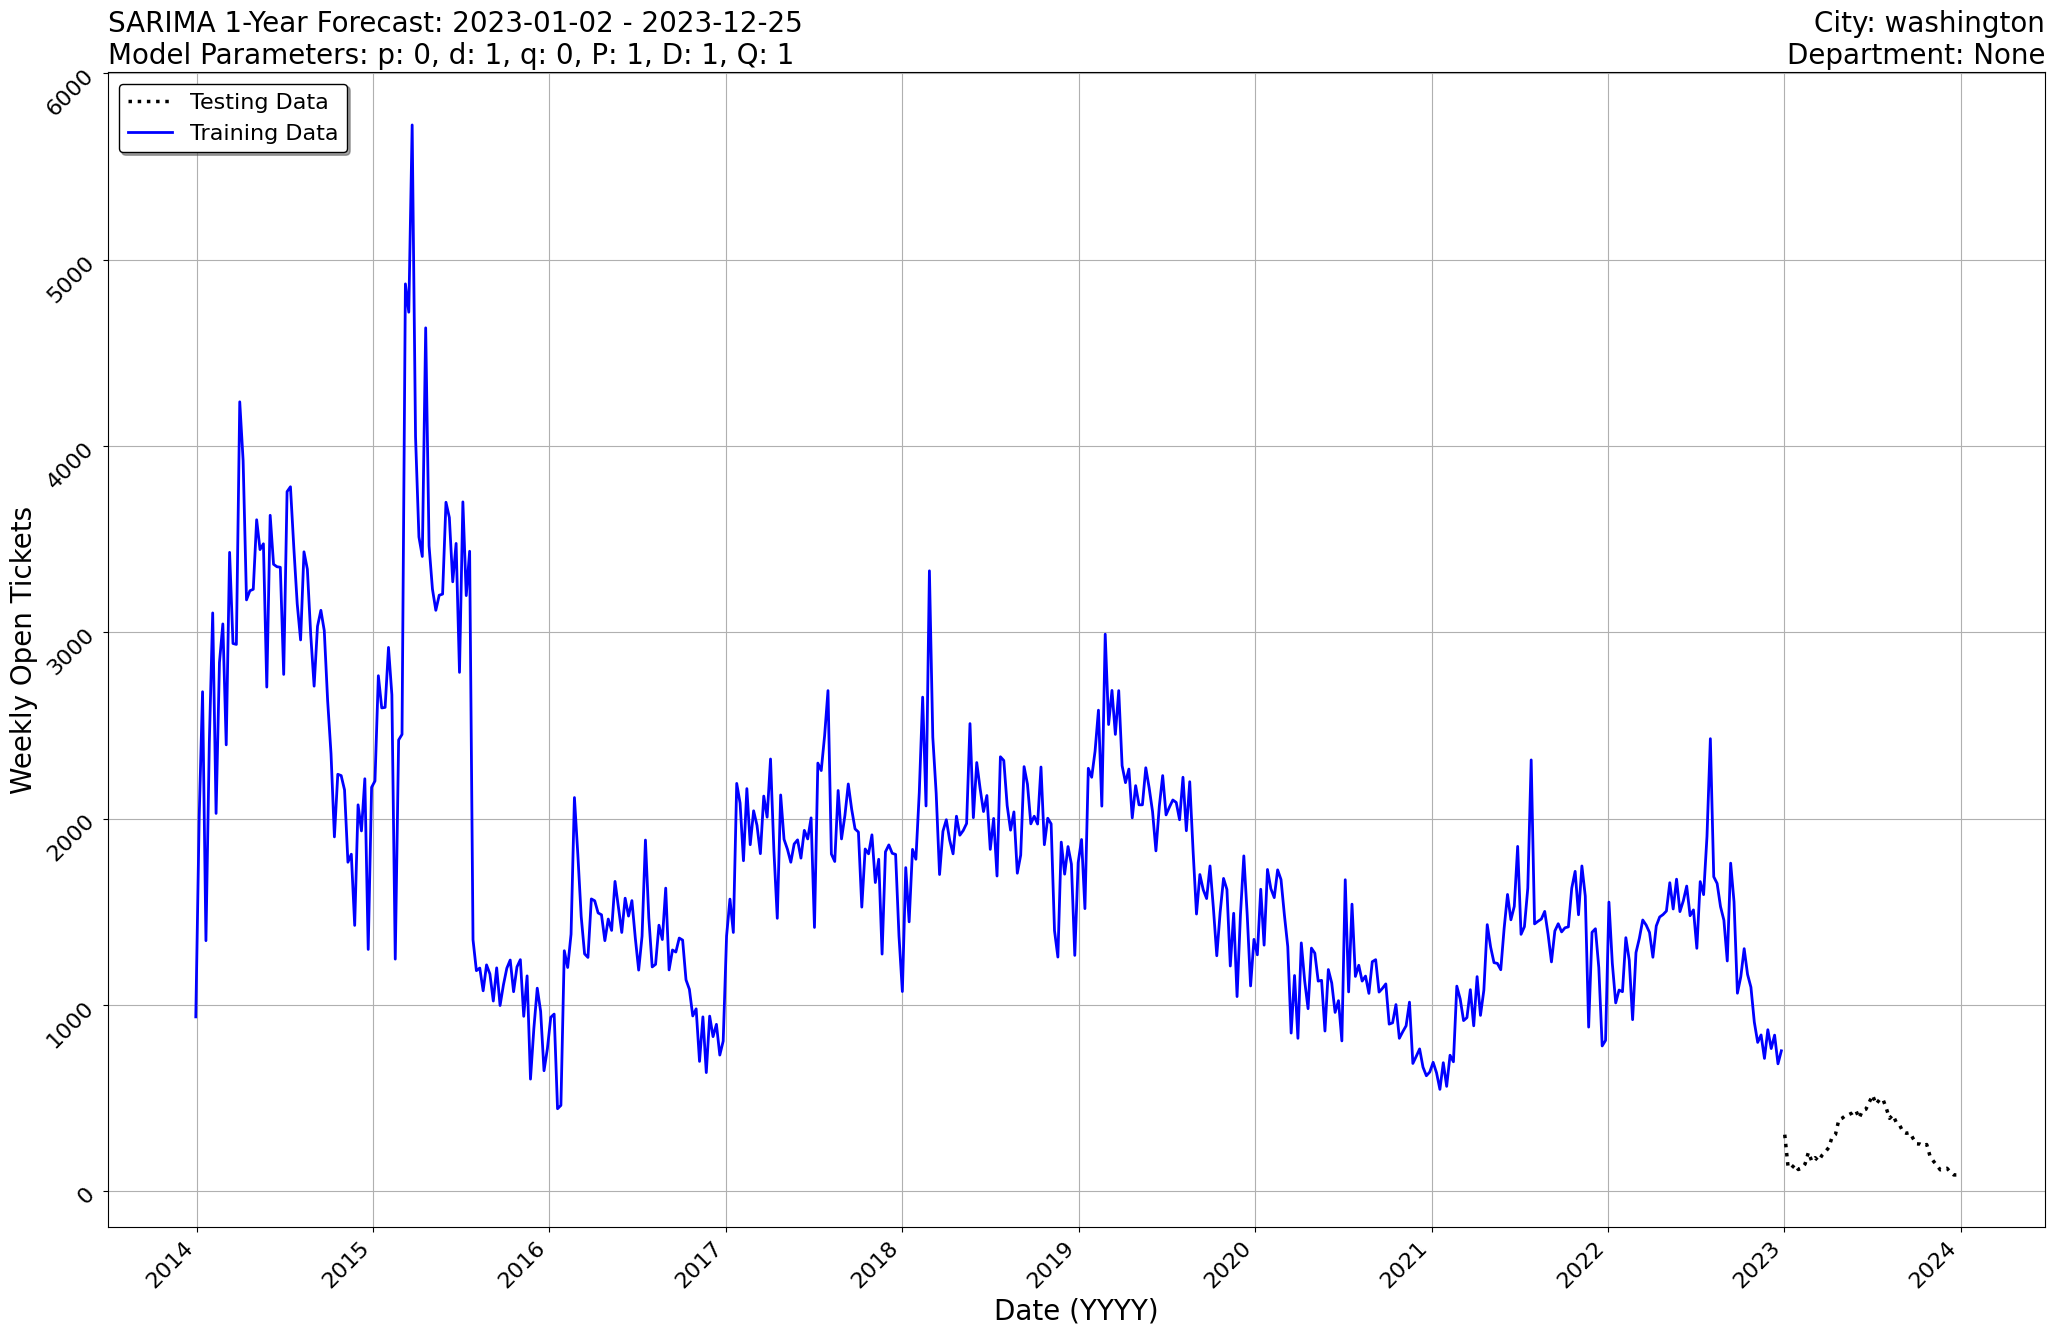

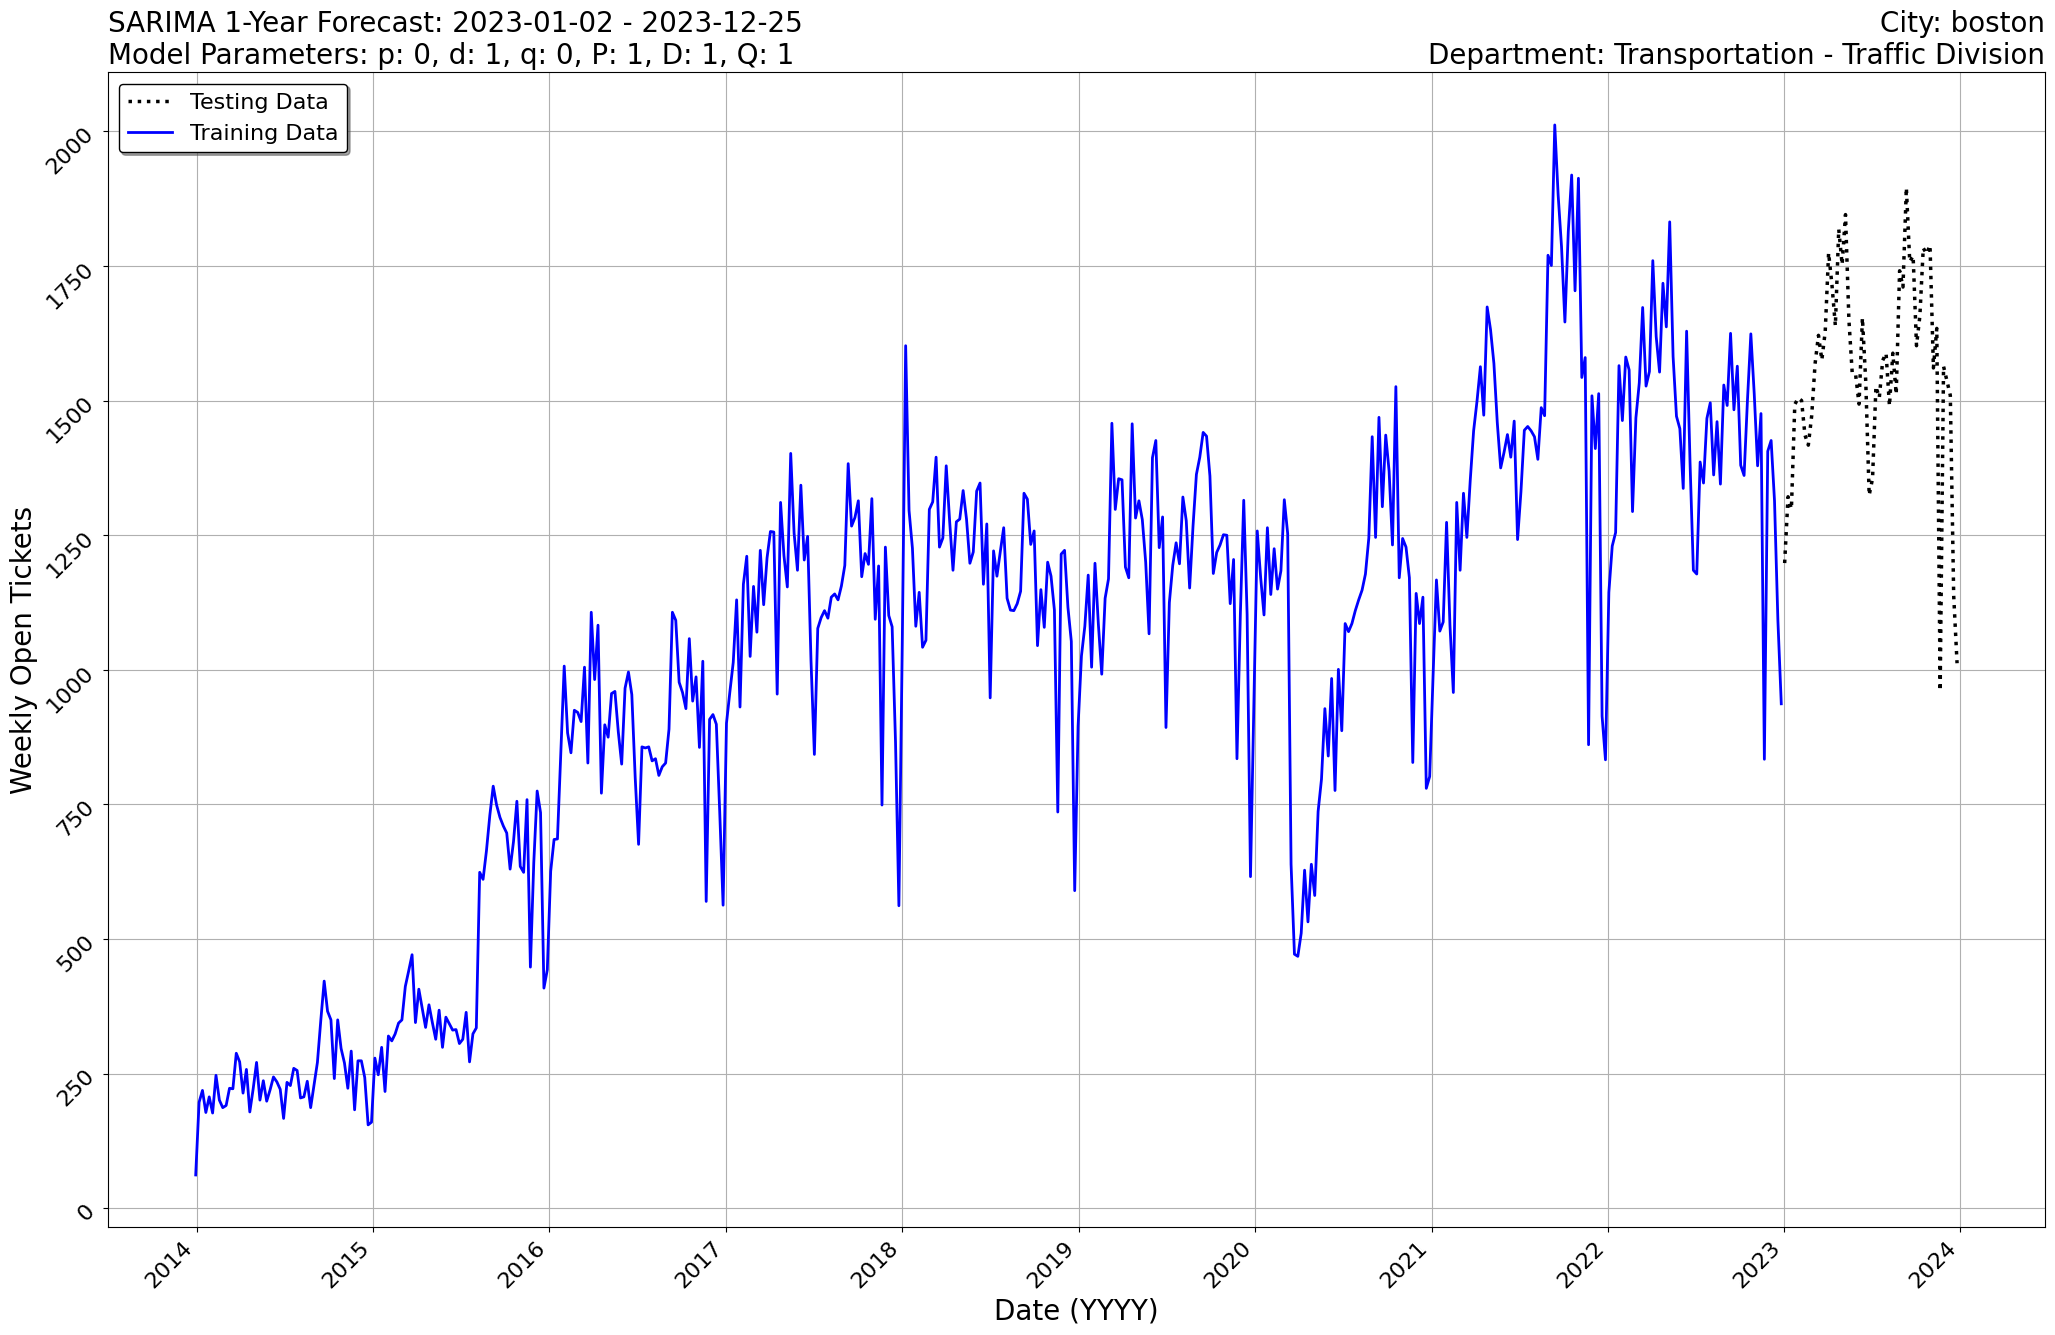

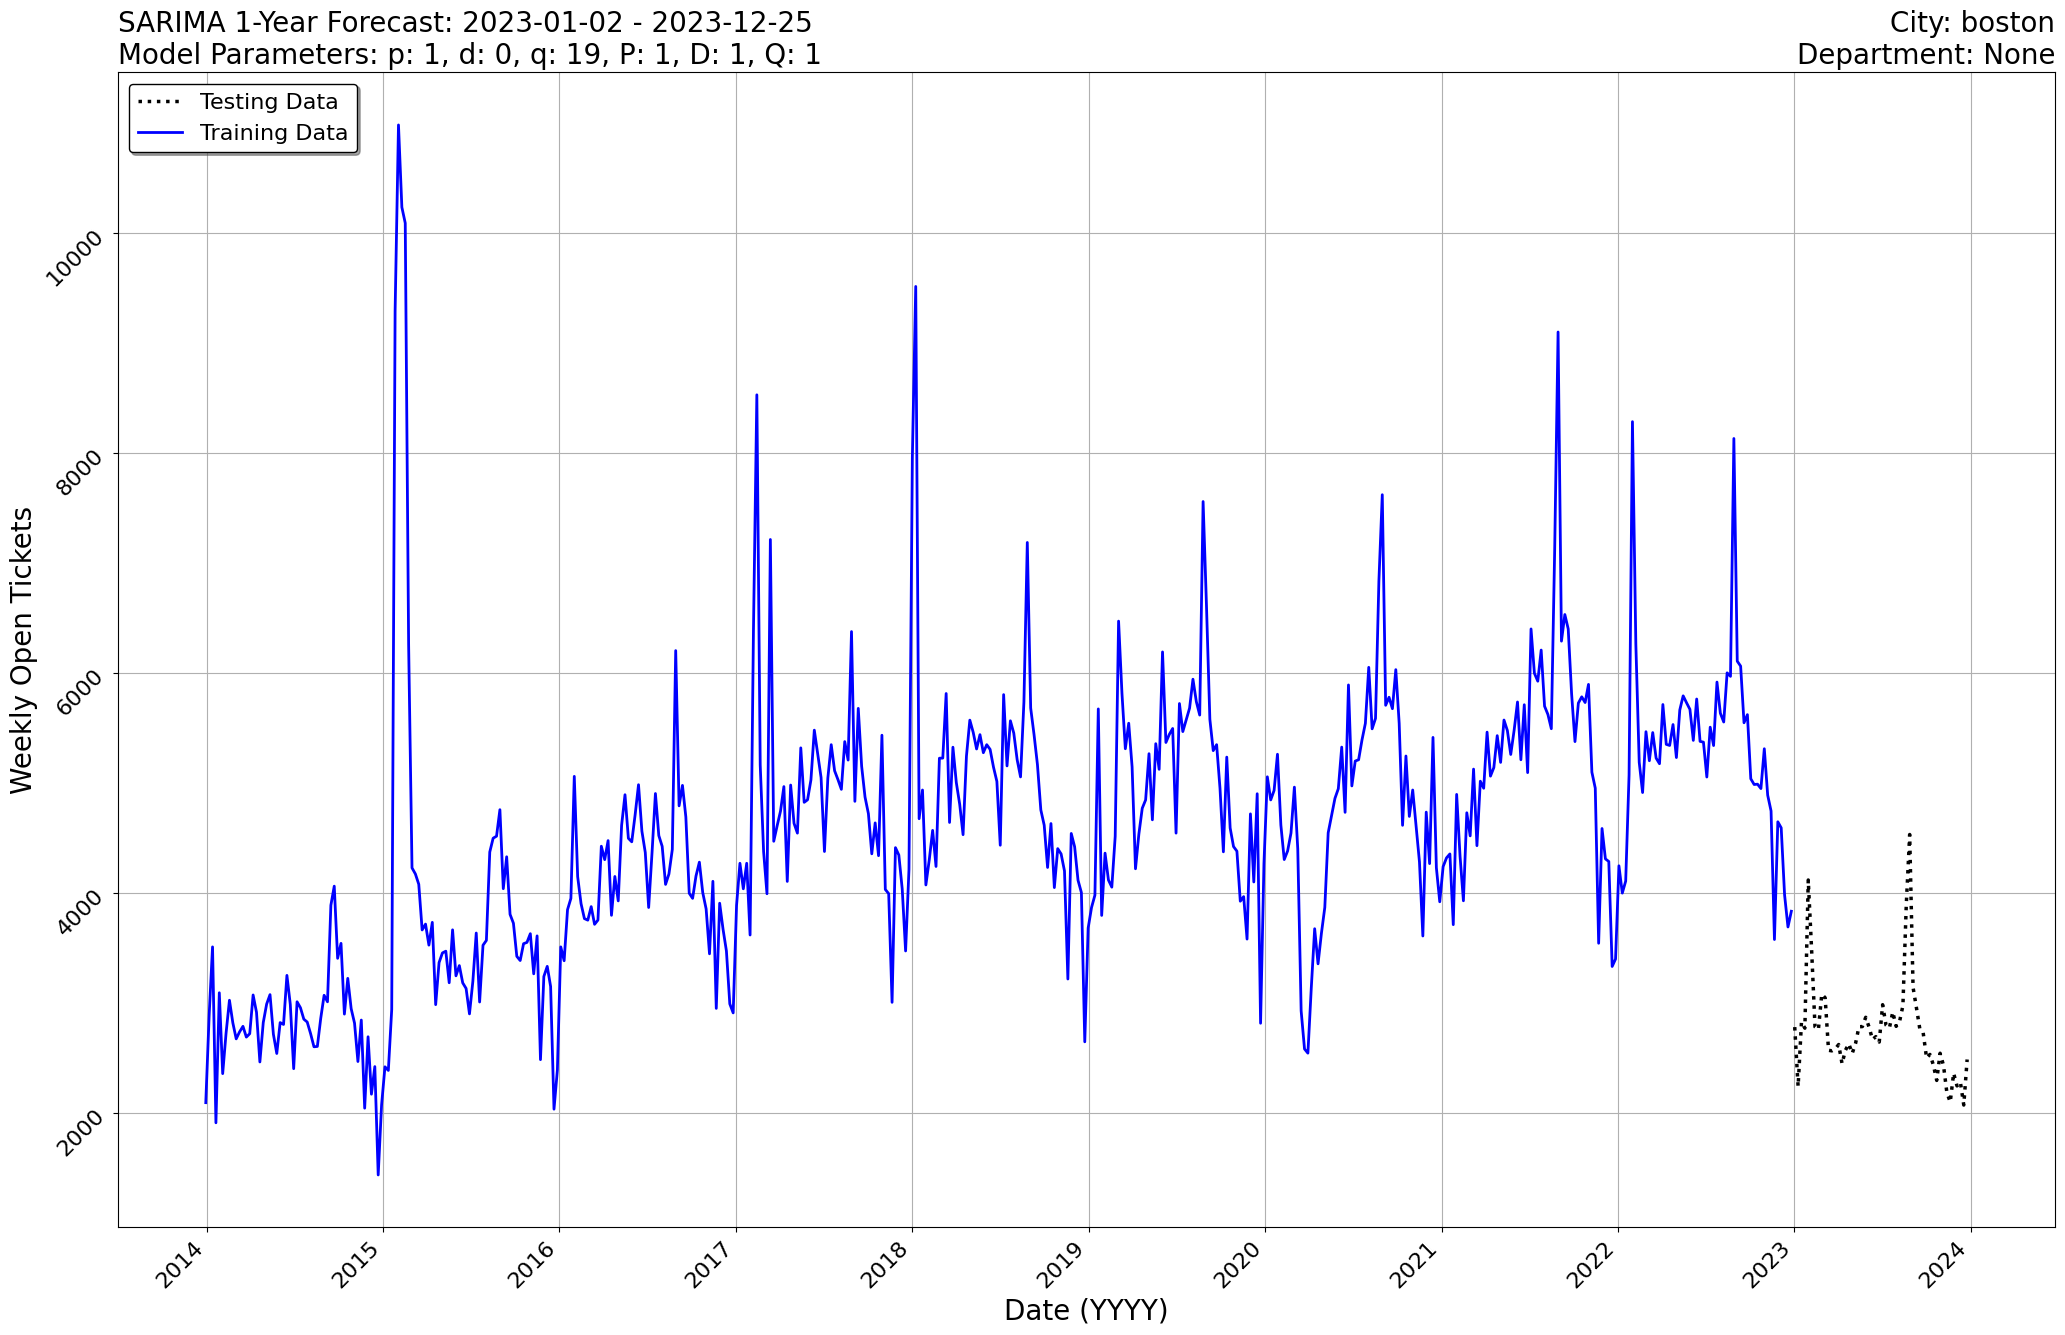

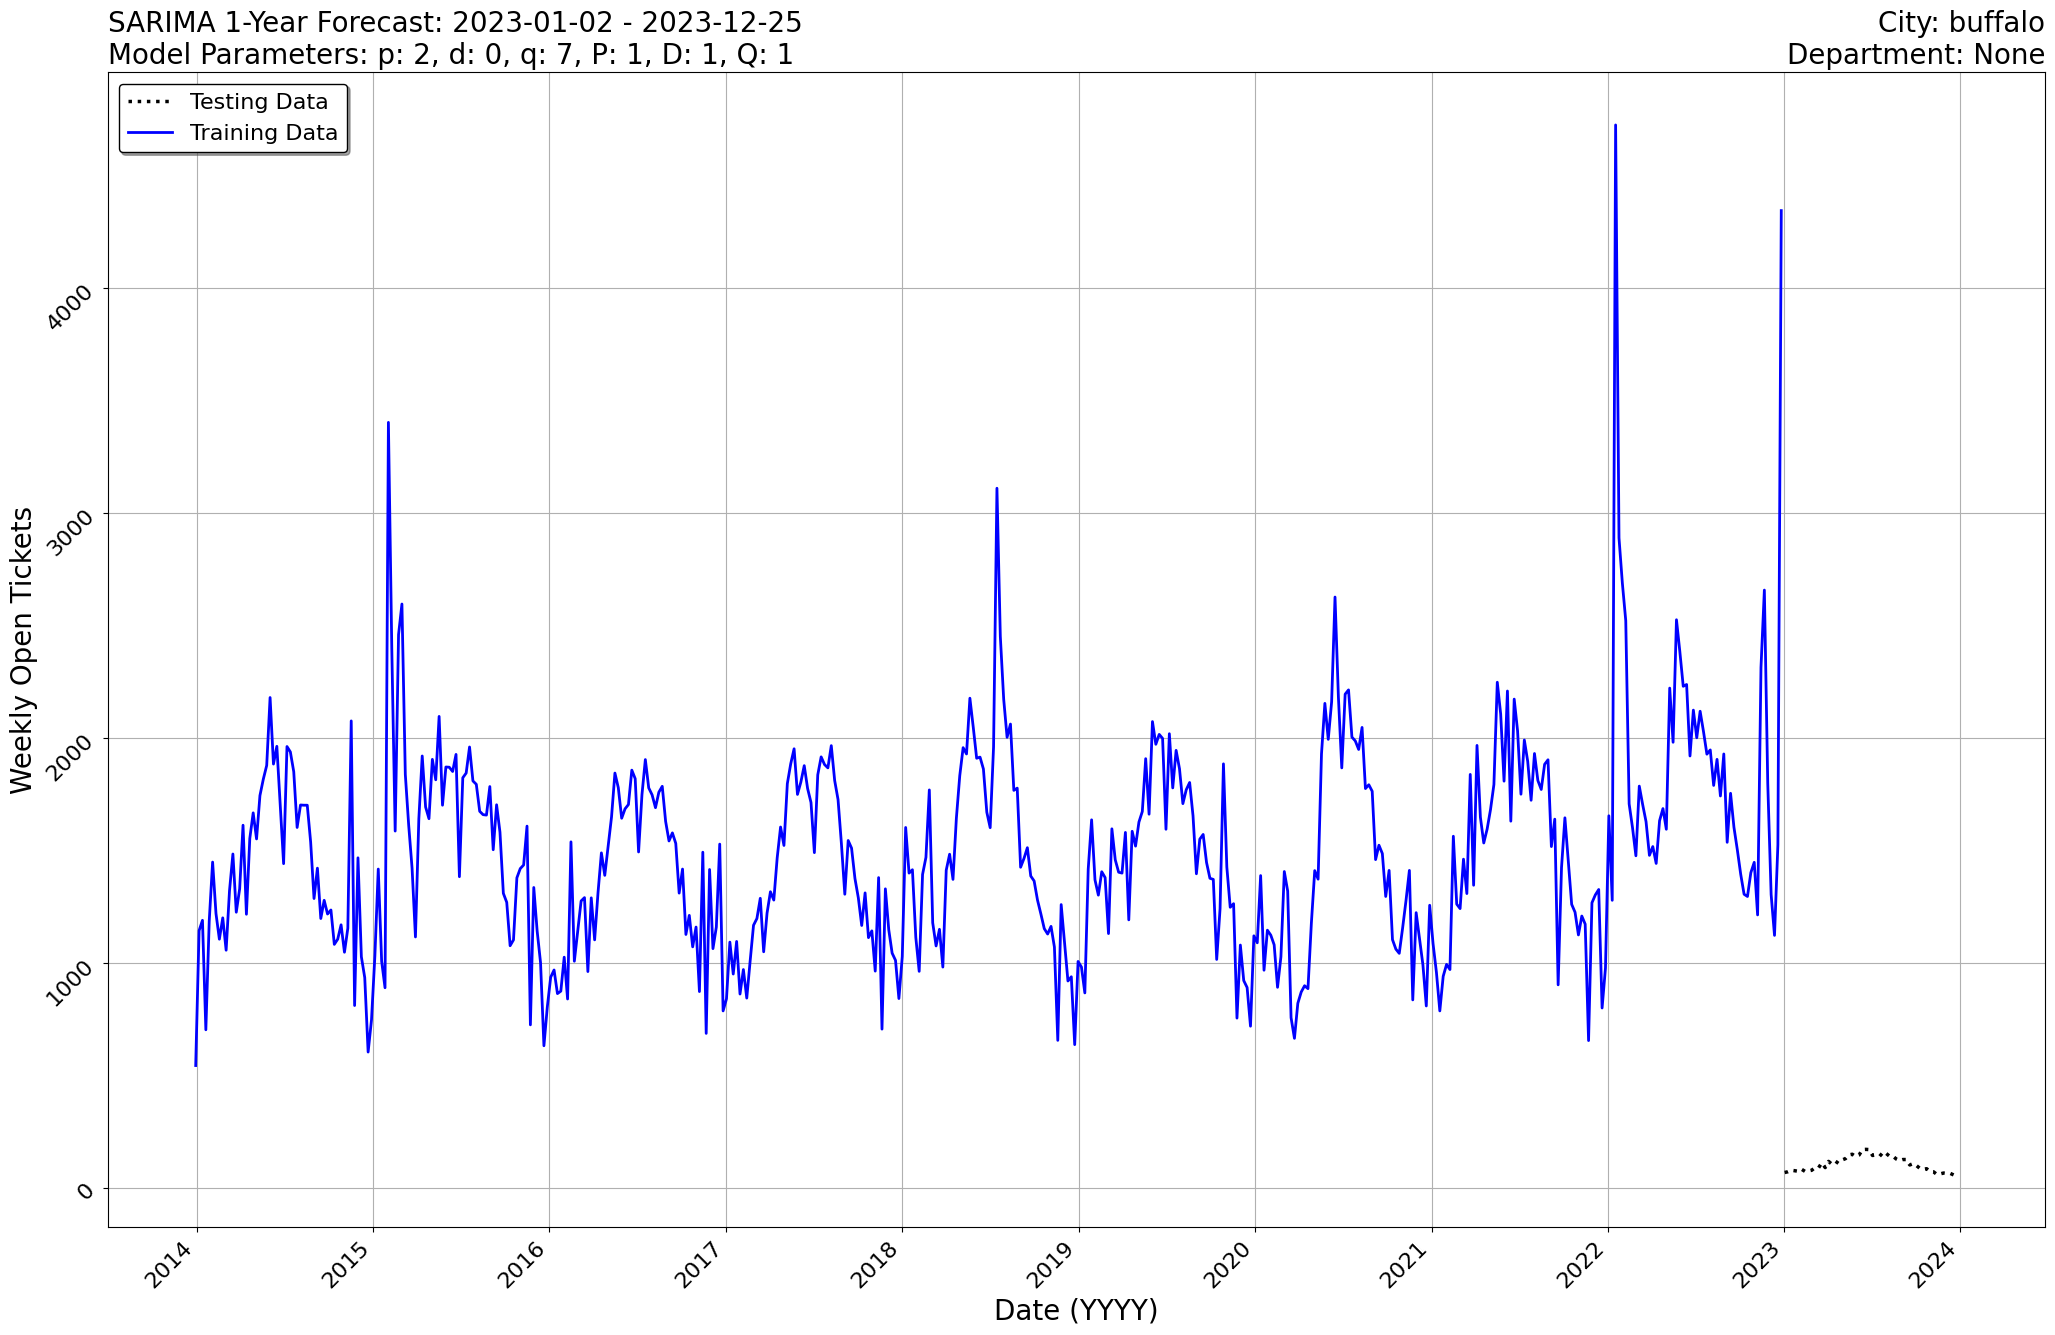

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

def plot_train_test_data(model_names, legend_font=14, title_font=20, label_font=16):

    for model_name in model_names:
        model_name_split = model_name.split('_')
        if len(model_name_split) > 1:
            model_name_used = model_name_split[0]  # Use the first part if split results in more than one part
            model_name_none = model_name_split[1]  # Set model_name_none to None
        else:
            model_name_used = model_name  # Use the entire model name if split results in only one part
            model_name_none = None
        
        train_file = glob(os.path.join('../data/out/', f'*{model_name}_train*.csv'))[0]
        test_file = glob(os.path.join('../data/predictions/', f'*sarimax_{model_name}*.csv'))[0]
        model_file = glob(os.path.join('../models/', 'hyperparameters.csv'))[0]

        model_data = pd.read_csv(model_file)
        model_params = model_data[model_data['model_name'] == model_name]


        # Extract p, d, q, P, D, Q values
        p, d, q, P, D, Q = model_params[['p', 'd', 'q', 'P', 'D', 'Q']].values[0]

        train_data = pd.read_csv(train_file)
        train_data['week_start'] = pd.to_datetime(train_data['week_start'])  # Convert 'week_start' column to datetime

        test_data = pd.read_csv(test_file)
        test_data['week_start'] = pd.to_datetime(test_data['week_start'])  # Convert 'week_start' column to datetime

        start_date = test_data.week_start.iloc[0].strftime('%Y-%m-%d')
        end_date = test_data.week_start.iloc[-1].strftime('%Y-%m-%d')

        plt.plot(test_data['week_start'], test_data['y_pred'], label='Testing Data', c='k', linestyle=':', linewidth=2.5)
        plt.plot(train_data['week_start'], train_data['count'], label='Training Data', c='b', linewidth=2)

        plt.title(f'SARIMA 1-Year Forecast: {start_date} - {end_date}\nModel Parameters: p: {p}, d: {d}, q: {q}, P: {P}, D: {D}, Q: {Q}', fontsize=title_font, fontweight='normal', loc='left')
        plt.title(f'City: {model_name_used}\nDepartment: {model_name_none}', fontsize=title_font, fontweight='normal', loc='right')

        plt.xlabel('Date (YYYY)', fontsize=label_font + 4)
        plt.ylabel('Weekly Open Tickets', fontsize=label_font + 4)

        plt.xticks(rotation=45, ha='right', fontsize=label_font)  # Rotate x-axis labels
        plt.yticks(rotation=45, ha='right', fontsize=label_font)  # Rotate y-axis labels

        plt.legend(loc='upper left', frameon=True, fontsize=legend_font + 2, shadow=True, edgecolor='black')
        plt.grid(True)
        plt.show()

# Example usage:
model_names = [
    'buffalo_Buffalo Police Department',
    'oakland_PARKING',
    'buffalo_DPIS',
    'washington_UFA',
    'washington_TOA-CW',
    'washington_TOA-S&M',
    'boston_Public Works Department',
    'oakland',
    'oakland_STREETSW',
    'oakland_ILLDUMP',
    'boston_Inspectional Services',
    'buffalo_Dept of Public Works',
    'washington',
    'boston_Transportation - Traffic Division',
    'boston',
    'buffalo']
plot_train_test_data(model_names)
